# Name : Ashutosh Chaudhary

# Task 5 : EDA on IPL Datasets

#### In this task we have to perform EDA on IPL matches dataset and deliveries dataset to findout the most successful teams, players and factors contributing to the win or loss of a team. we also have to suggest companies to the teams and players whose product they can endorse.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
match = pd.read_csv('.//Downloads//matches.csv')
ball = pd.read_csv('.//Downloads//deliveries.csv')

In [3]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Working on Match Dataset

### History of the IPL :

#### In the 2011 season of the IPL two more teams were included in the IPL which were Kochi Tuskers Kerala and Pune Sahara Warriors. However after playing for only one season the Kochi Tuskers Team was disbandoned and the Pune Sahara Warriors played till the 2013 season of the IPL and then was disbandoned.

#### In 2016 two new teams were added to the IPL which were participating in the tournament due to the banning of the former 2 teams of the tornament for 2 years which were Rajasthan Royals and Chennai Super Kings and the the 2 new teams that were added were Gujarat Lions and Rising Pune Supergiants. After the 2 year ban was over, both the former teams were reentered the tournament and the new teams were disbandoned.

#### Also for the last 2-3 years Delhi's team has changed its name from Delhi Daredevils to Delhi Capitals and this year the Punjab team has changed its name from Kings XI Punjabs to Punjab Kings. Also there was team named Hyderabad Deccan Chargers present in IPL tornament till 2012. after that the team was replaced by the Hyderabad's new team named Sunrisers Hyderabad.

In [5]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Beginning of The EDA

### By looking at the match dataset we can figure out the target column is winner

### id

In [6]:
match['id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [7]:
match['id'].value_counts()

11311    1
248      1
257      1
256      1
255      1
        ..
503      1
502      1
501      1
500      1
1        1
Name: id, Length: 756, dtype: int64

#### By looking at the id column values, we can reach to this conclusion that this column does not help at all in determining the winning team in any way. Thus we cannot make the decision to pick the best team using this column. Hence it can be dropped from the dataset.

In [8]:
match.drop(['id'], axis= 1, inplace= True)

### season

In [9]:
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [10]:
match['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


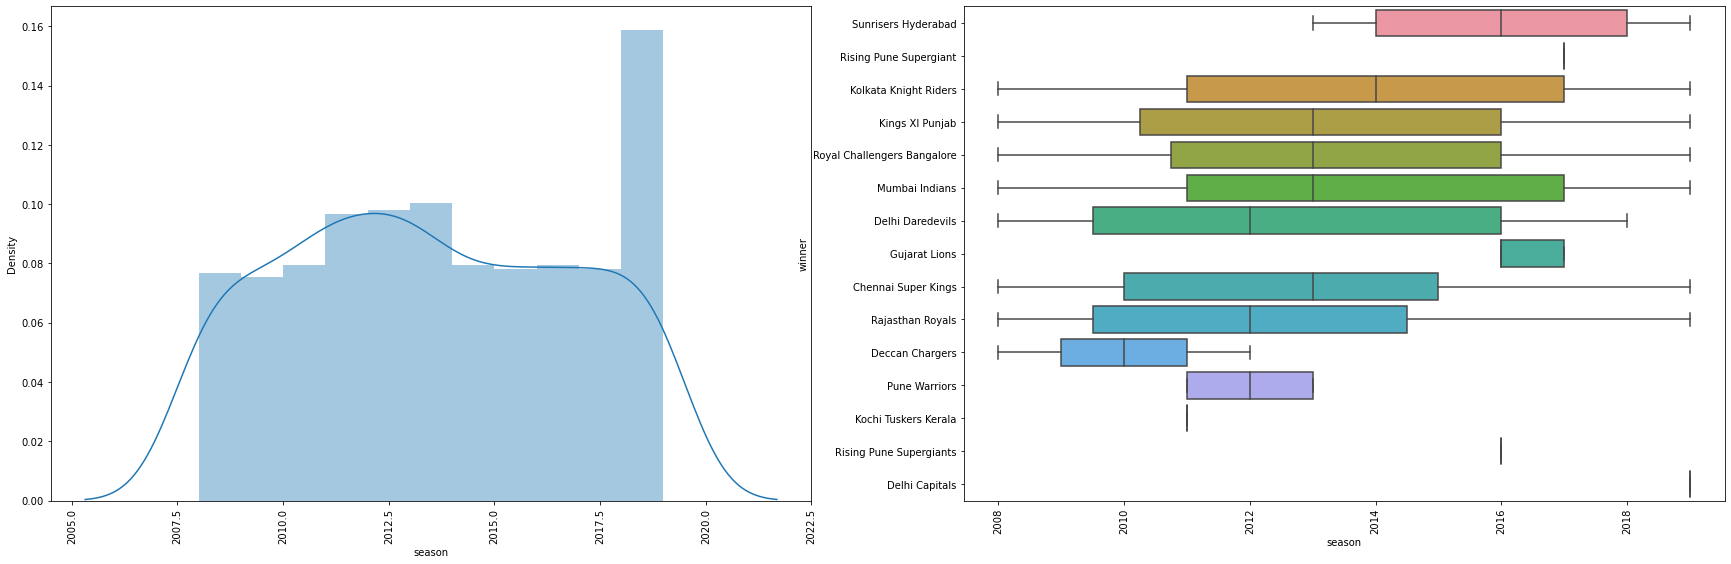

In [11]:
# visualizing the season
plt.figure(figsize= [30,20])
plt.subplot(221)
sns.distplot(match['season'])
plt.xticks(rotation= 90)

plt.subplot(222)
sns.boxplot(x= 'season', y= 'winner', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the distplot we can see that it not a normal distributed graph and the most of the matchs and neither it is a properly skewed graph. From the boxplot we can see that there are no outliers present in any of the team and the most variance the team is getting is Delhi Daredevils. By looking at this plot it can only be deduce that the only way a teams winning can be affected by the season column is by the auction held in that season.

### city

In [12]:
match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [13]:
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Ranchi              7
Cuttack             7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


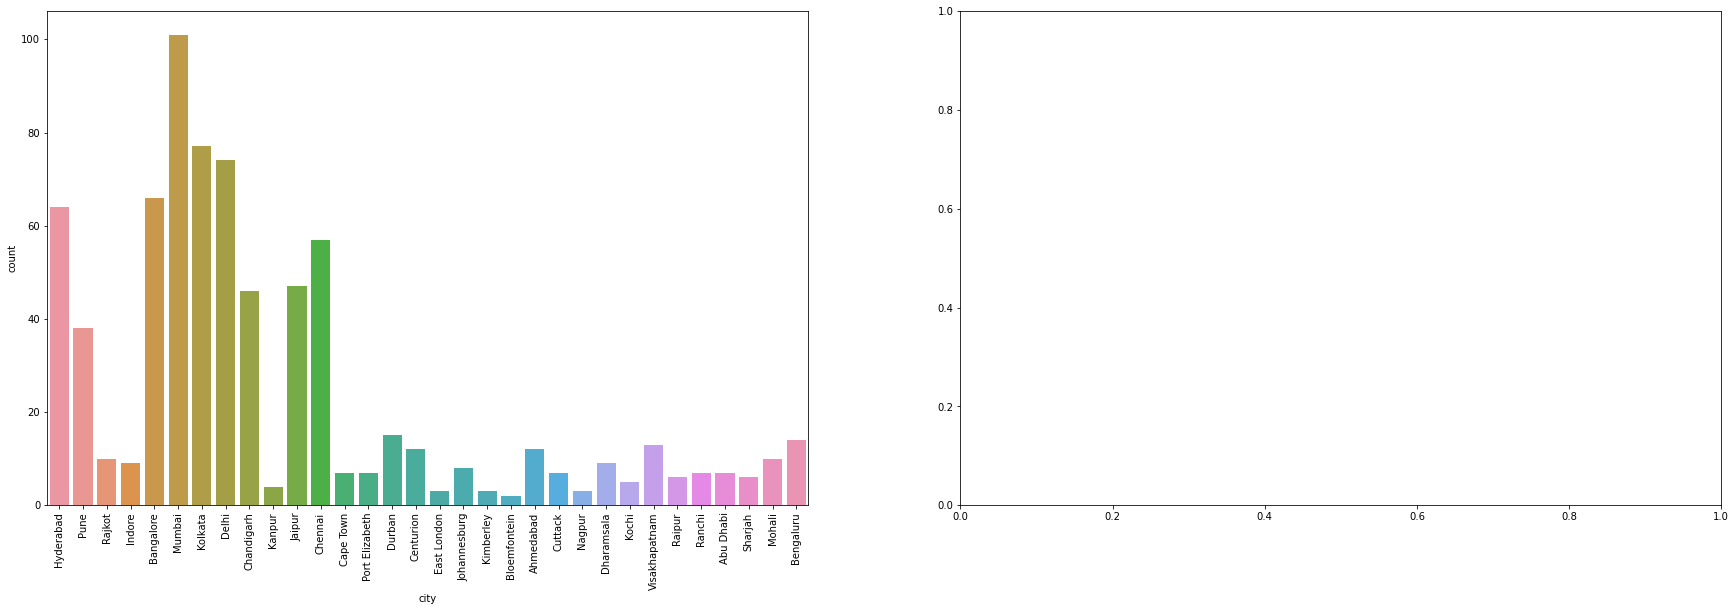

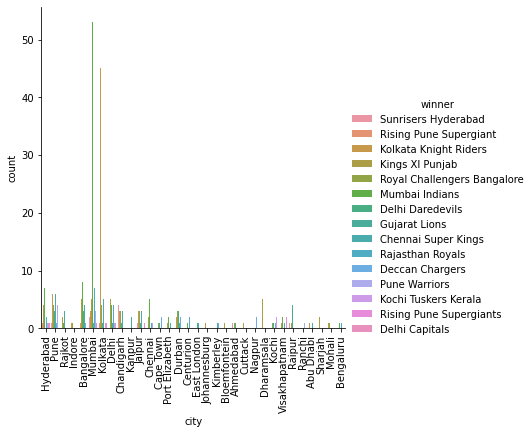

In [14]:
# visualizing the city
plt.figure(figsize= [30,20])
plt.subplot(221)
sns.countplot(match['city'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='city', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### From the countplot we can see that most of the matches of the IPL has occured in the mumbai and by looking at the catplot we can see that most of matches in the tournament overall are won by mumbai indian. From this we can see that mumbai indian has won because most of the matches has occured in mumbai and it gives the mumbai indians the home ground advantage which can play the factor in winning the matches.

### date

In [15]:
match['date'].unique()

array(['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
       '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
       '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
       '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
       '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
       '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29',
       '2017-04-30', '2017-05-01', '2017-05-02', '2017-05-03',
       '2017-05-04', '2017-05-05', '2017-05-06', '2017-05-07',
       '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
       '2017-05-12', '2017-05-13', '2017-05-14', '2017-05-16',
       '2017-05-17', '2017-05-19', '2017-05-21', '2008-04-18',
       '2008-04-19', '2008-04-20', '2008-04-21', '2008-04-22',
       '2008-04-23', '2008-04-24', '2008-04-25', '2008-04-26',
       '2008-04-27', '2008-04-28', '2008-04-29', '2008-04-30',
       '2008-05-01', '2008-05-02', '2008-05-25', '2008-05-03',
       '2008-05-04', '2008-05-05', '2008-05-06', '2008-

#### By looking at the value of the date columns it can be say that there is no way that it can help in anyway to determining the winning team and this column can be genearlize by only making it into the only year column but it has already been present as the season column. So we can drop this column.

In [16]:
match.drop(['date'], axis= 1, inplace= True)

### team1

In [17]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


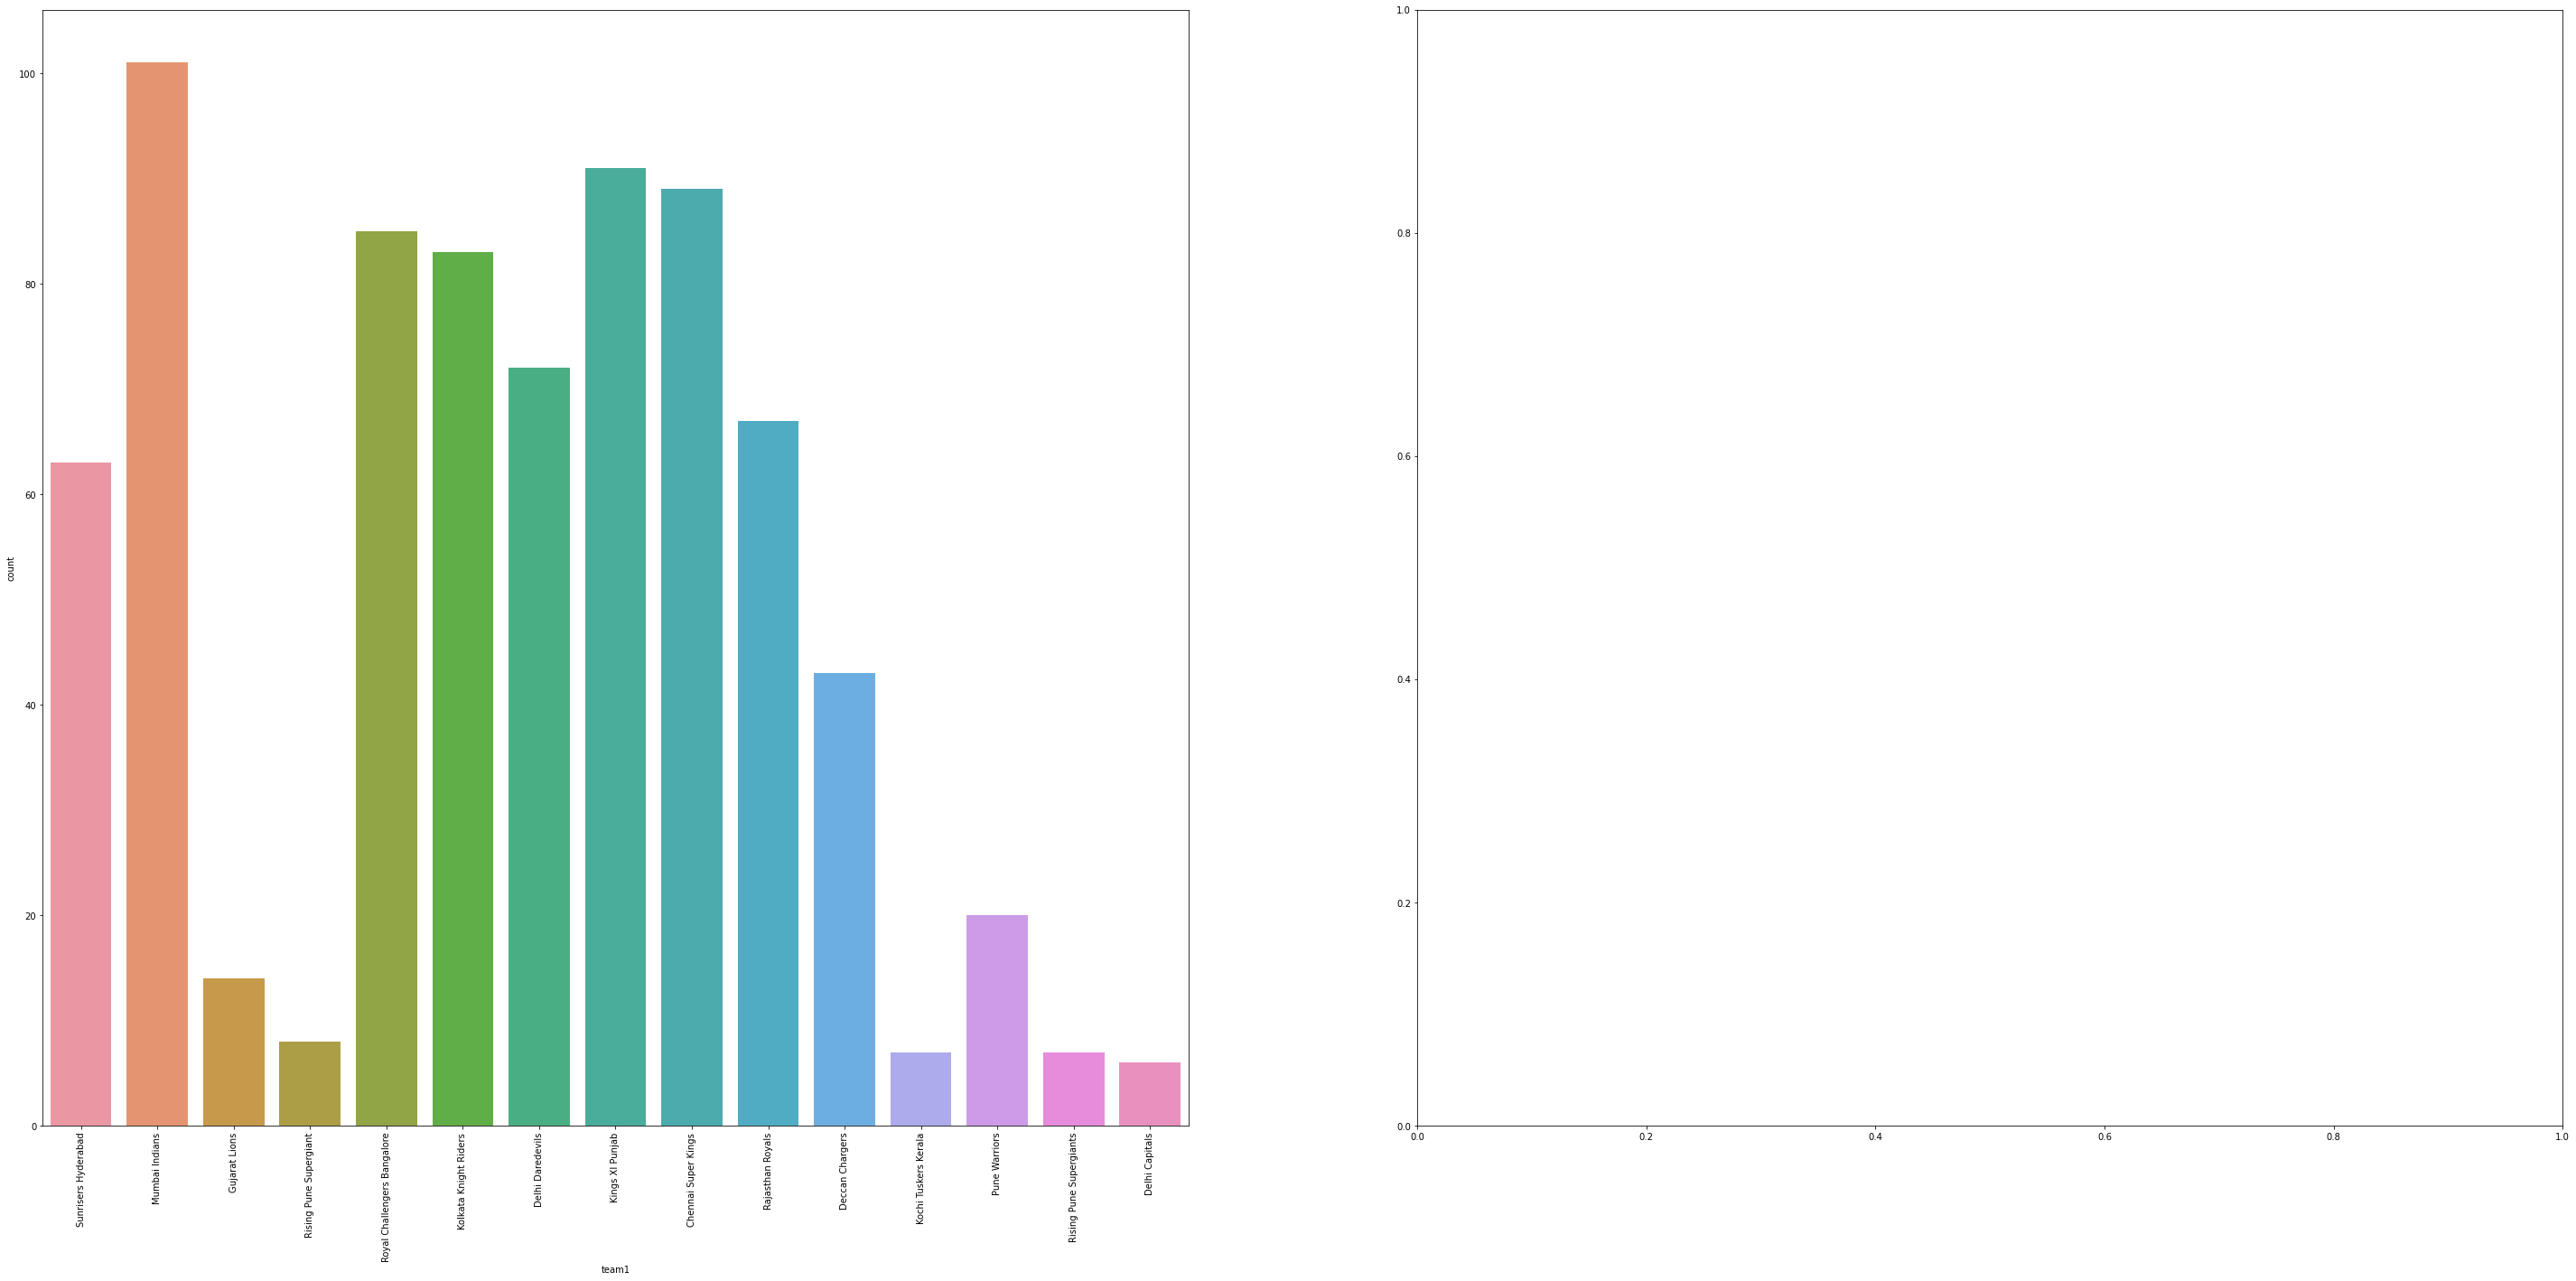

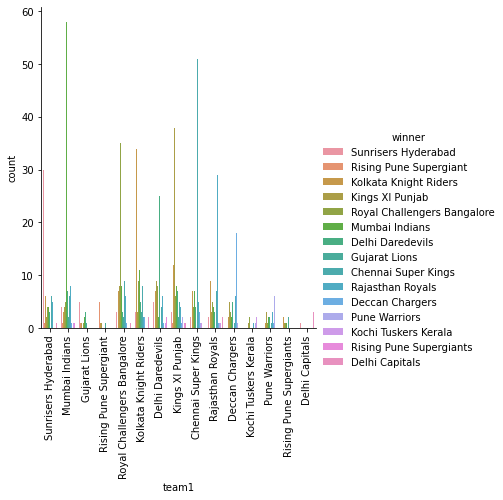

In [19]:
# visualizing the team1
plt.figure(figsize= [50,50])
plt.subplot(221)
sns.countplot(match['team1'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='team1', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at plotting of the team1 it can be seen that atleast 6 teams who played as team1 mostly won against their opponent.

### team2

In [20]:
match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
match['team2'].value_counts()

Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Delhi Capitals                 10
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


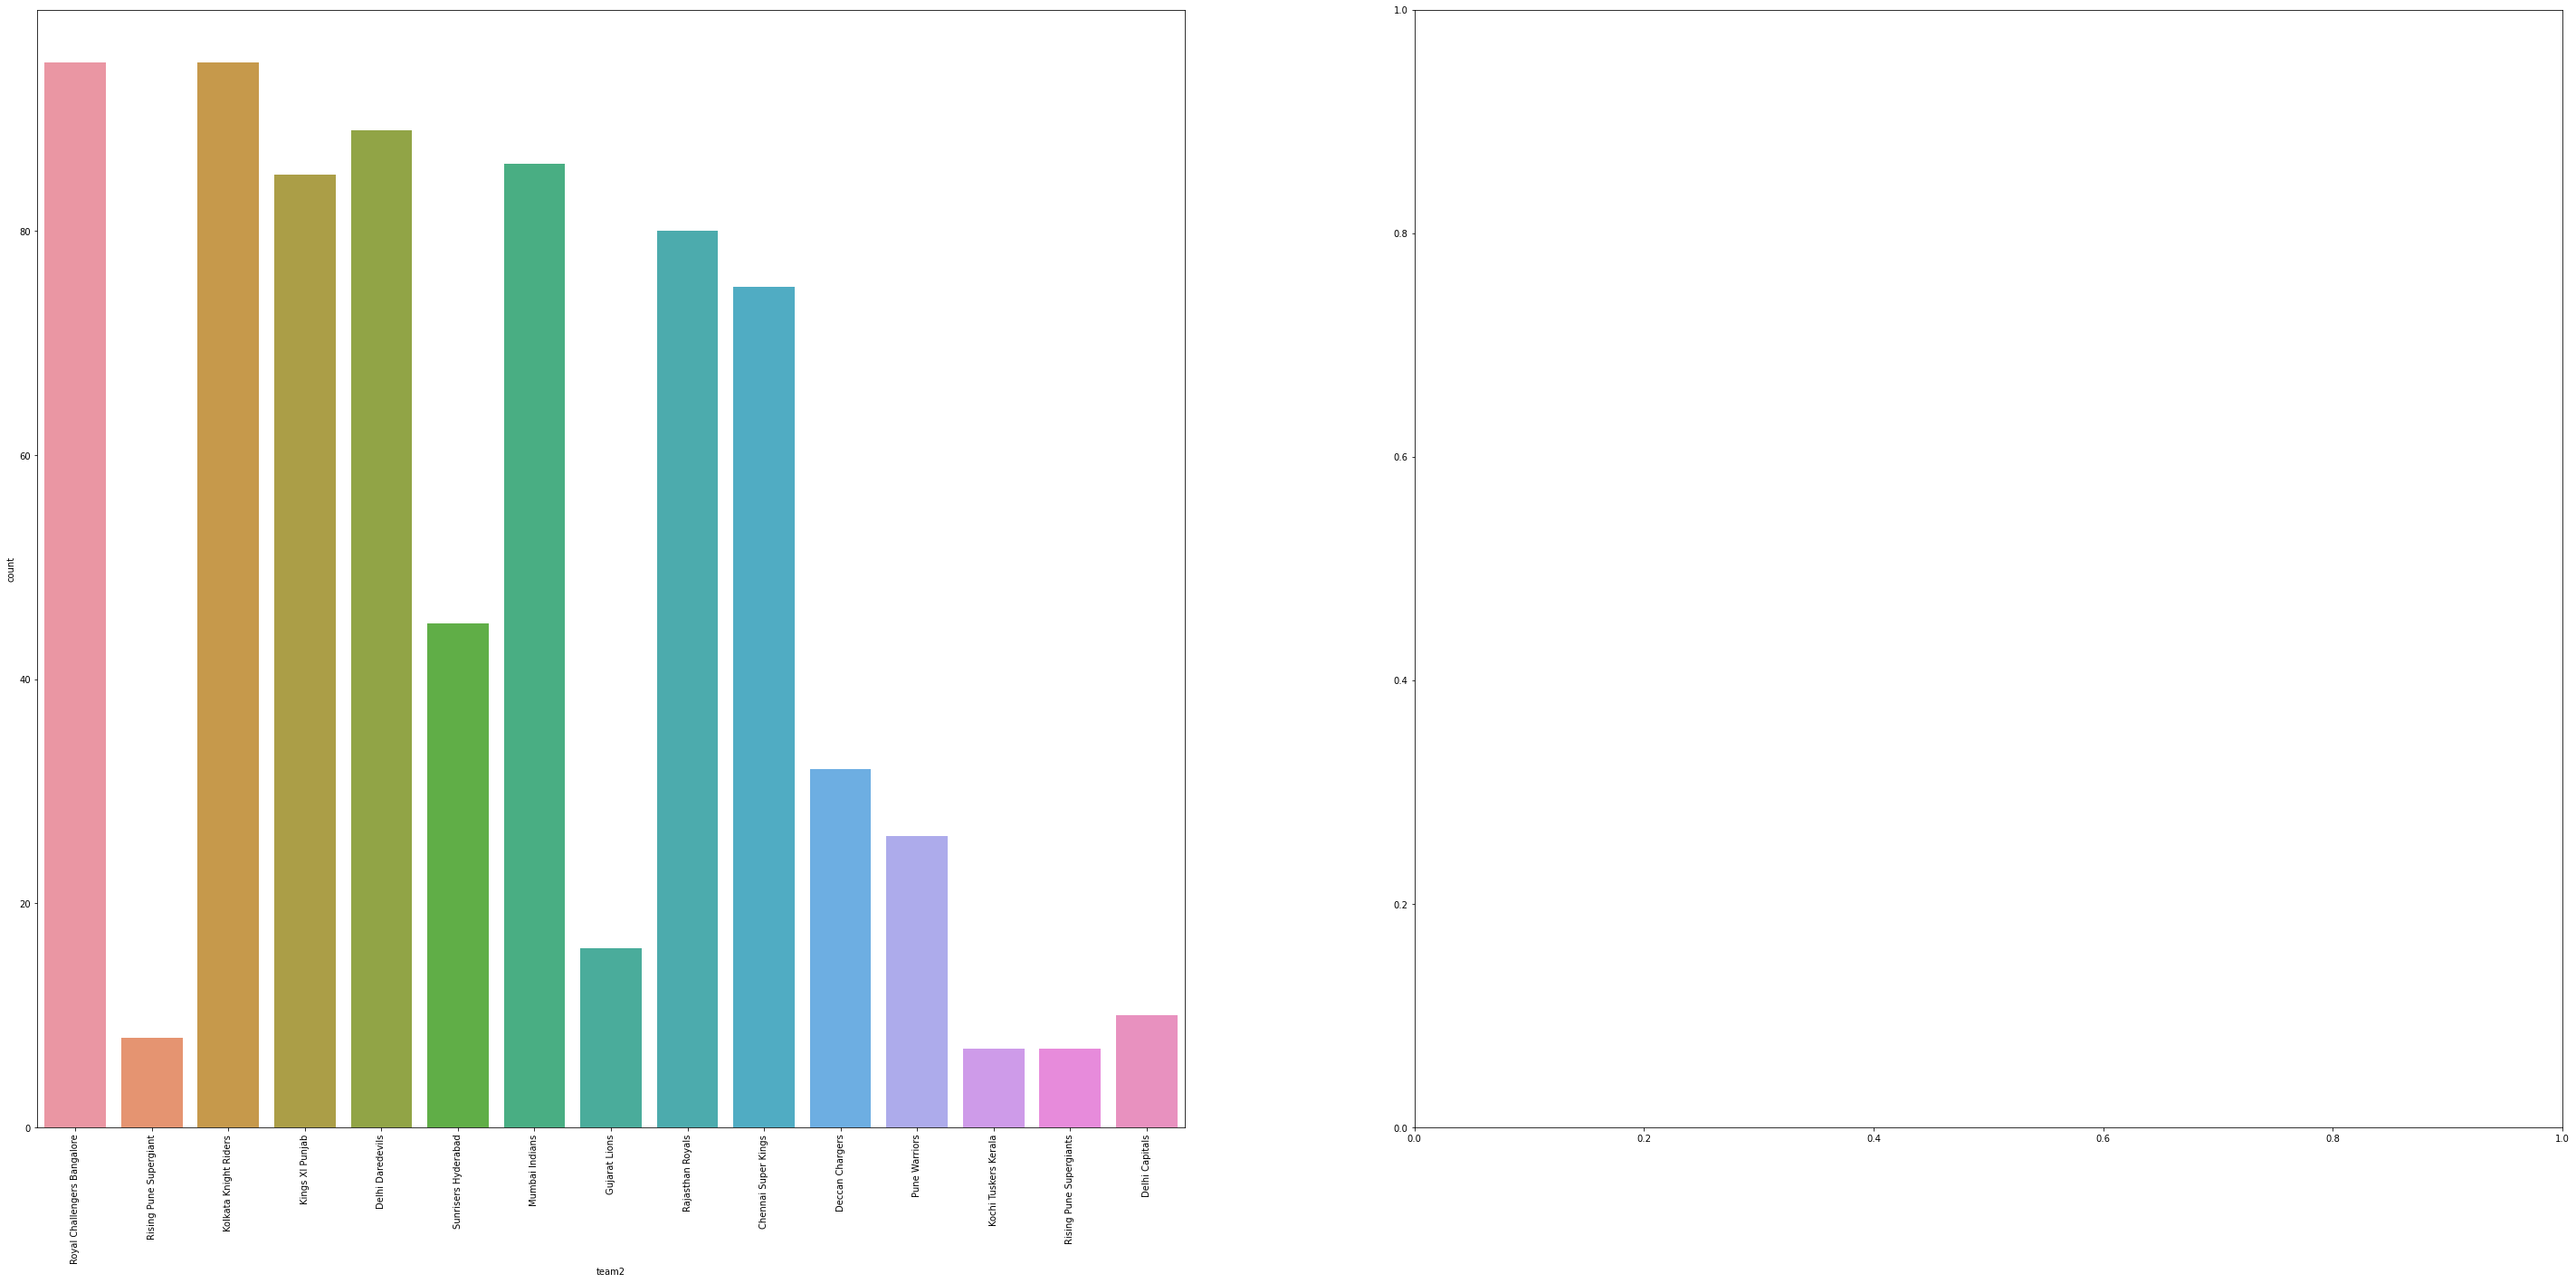

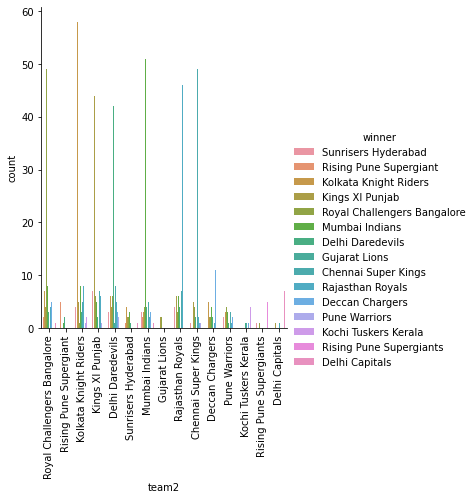

In [22]:
#visualizing team2
plt.figure(figsize= [50,50])
plt.subplot(221)
sns.countplot(match['team2'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='team2', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plotting of team2 we can see that atleast 8 teams won who played aginst their opponent.

### toss_winner

In [23]:
match['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [24]:
match['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


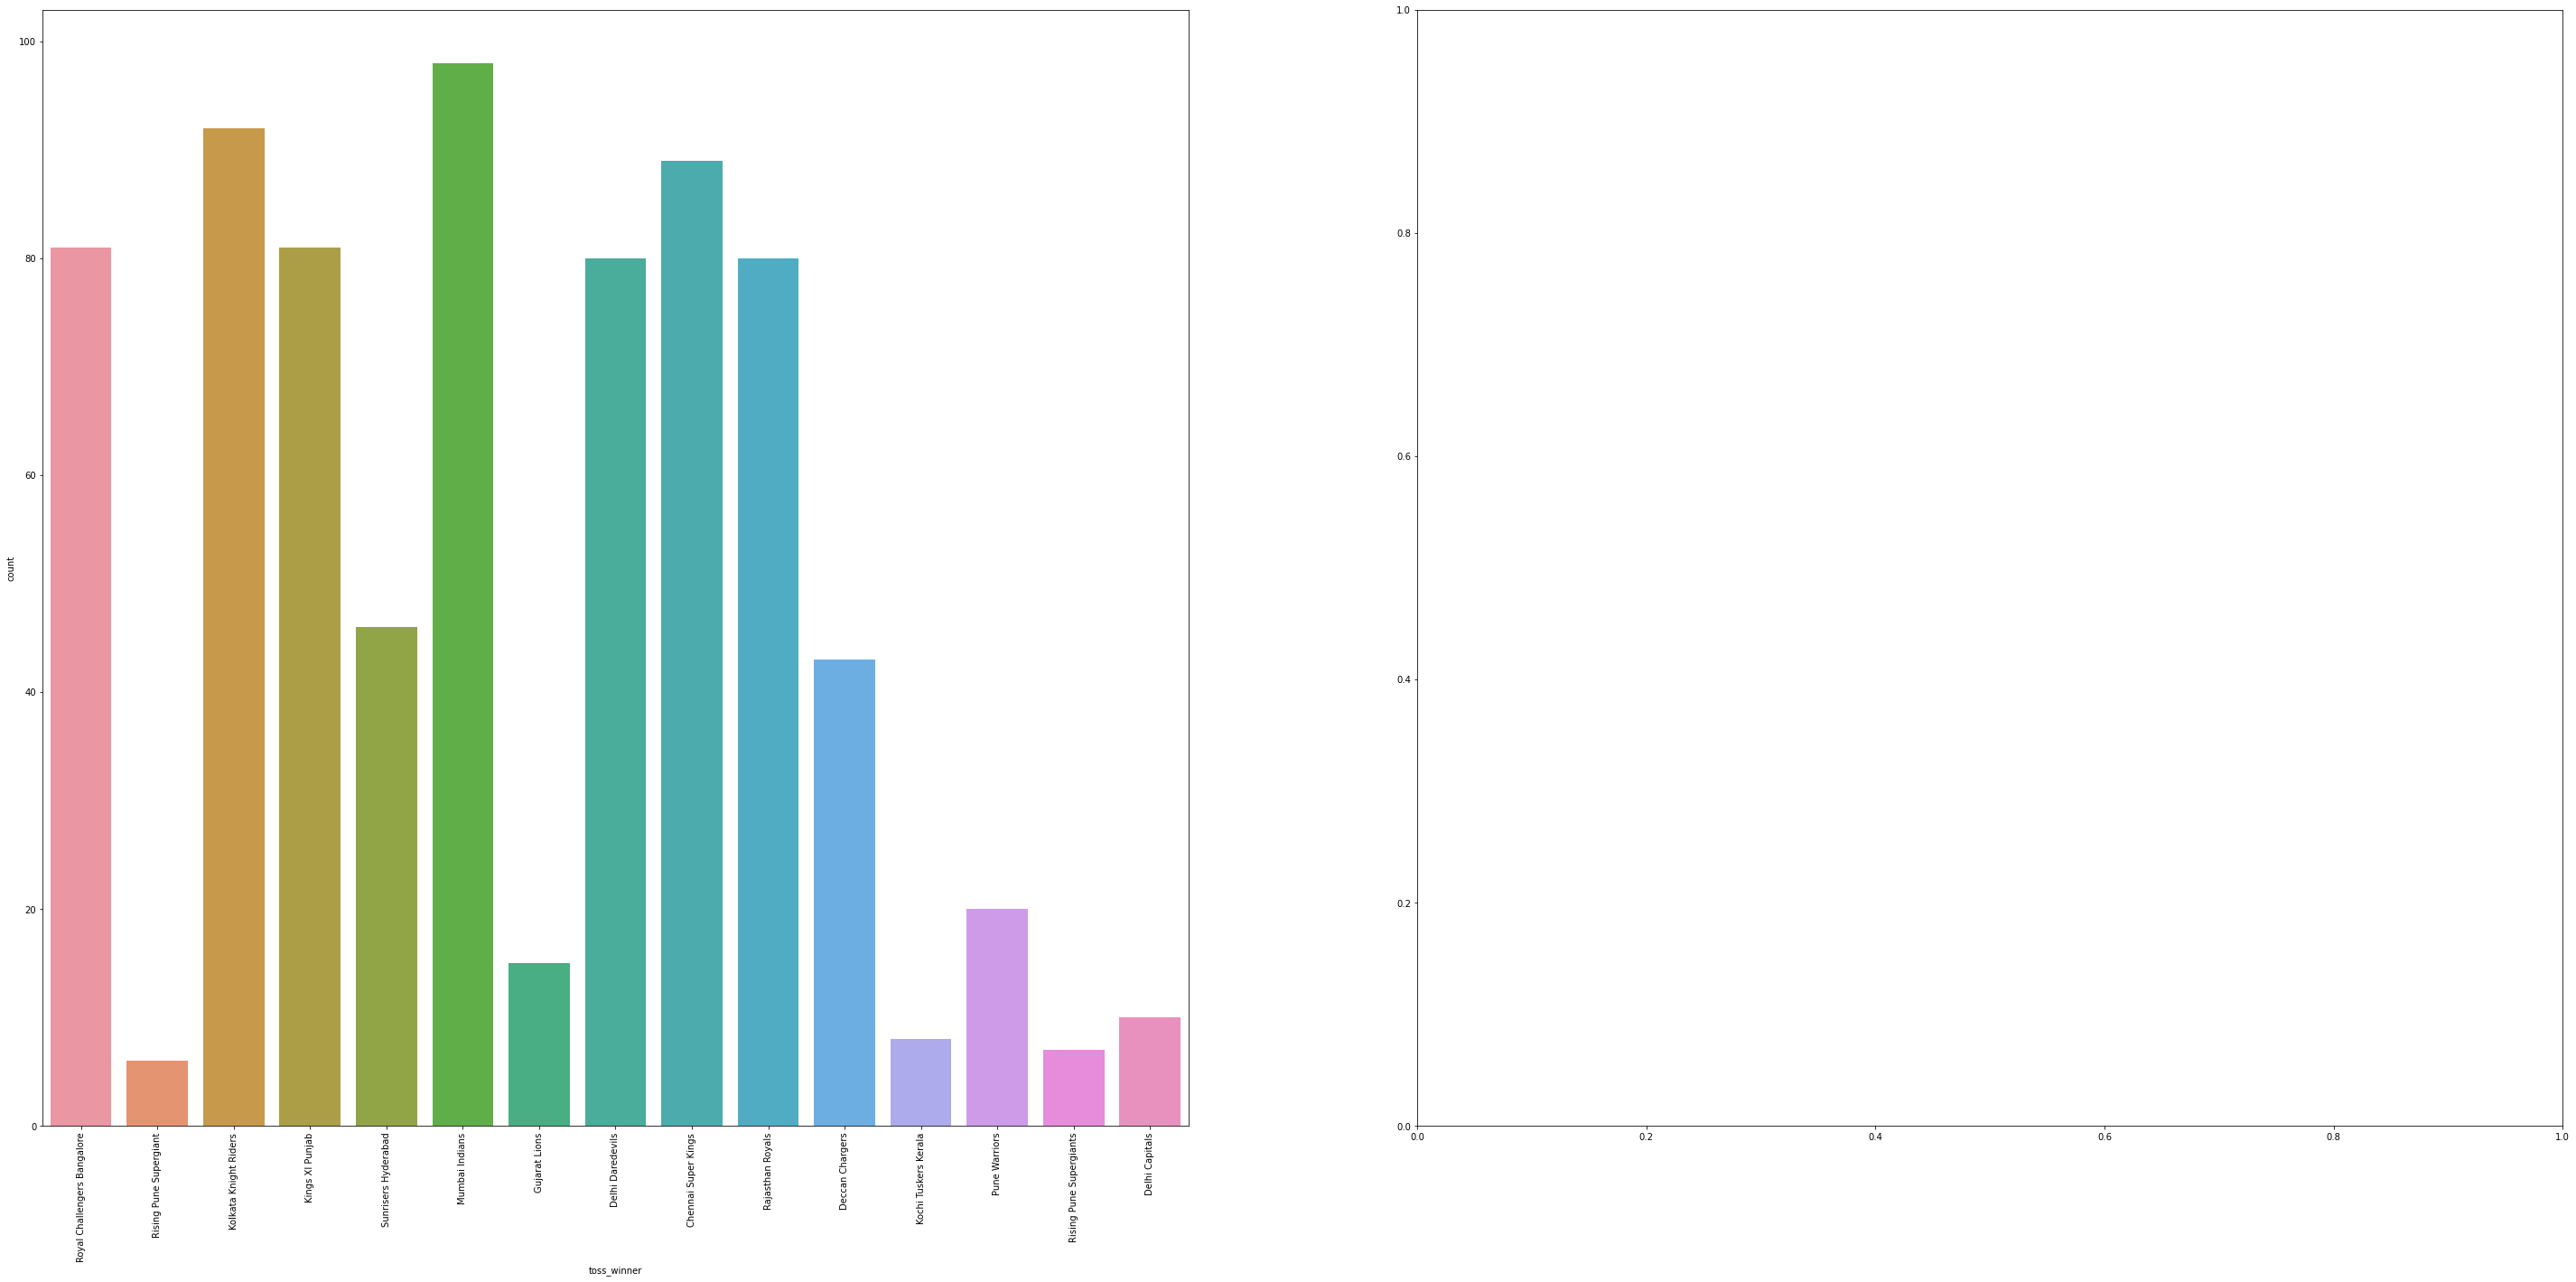

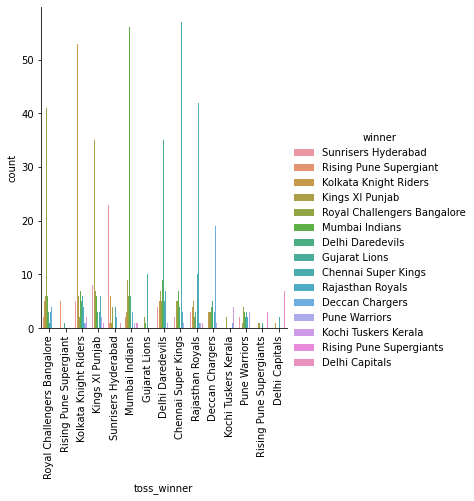

In [25]:
# visualizing the toss_winner
plt.figure(figsize= [50,50])
plt.subplot(221)
sns.countplot(match['toss_winner'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='toss_winner', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By lokking at the plots we can see that atleast 9 teams who won the toss won the most of their matches.

### toss_decision

In [26]:
match['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


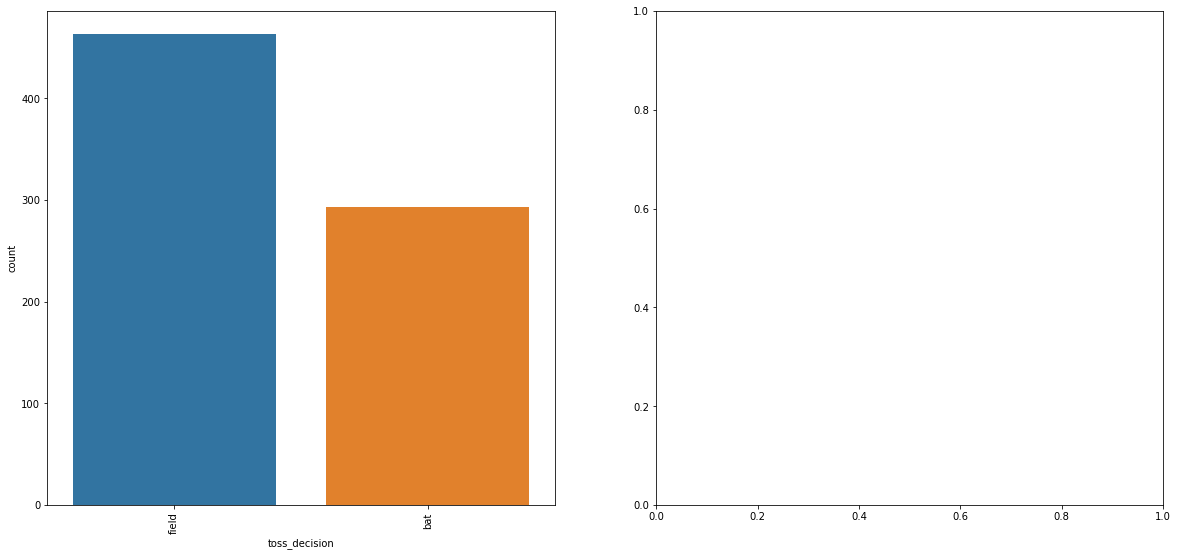

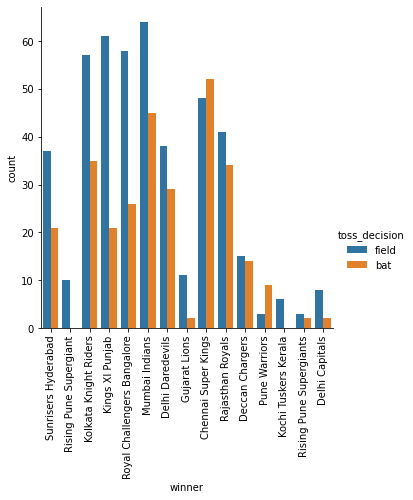

In [27]:
# visualizing the toss_decision
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['toss_decision'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='winner', hue= 'toss_decision', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plots we can see that the most of the teams chose to field after winning the toss and the another thing we can deduce that mumbai indians won most of the matches when they chose to field and chennai super kings won most of the matches when they chose to bat.

#### By looking at both the toss column's result we can see that atleast 9 teams who won the toss won the matches also which can tell that lucks play a great part in winning the toss. Also by looking at the toss_decision we can see that the most of the teams who chose to field won the matches. This also tells us that for making the decision lot of factors comes into play like condition of the pitch, dew factor, etc.

### result

In [28]:
match['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [29]:
match['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


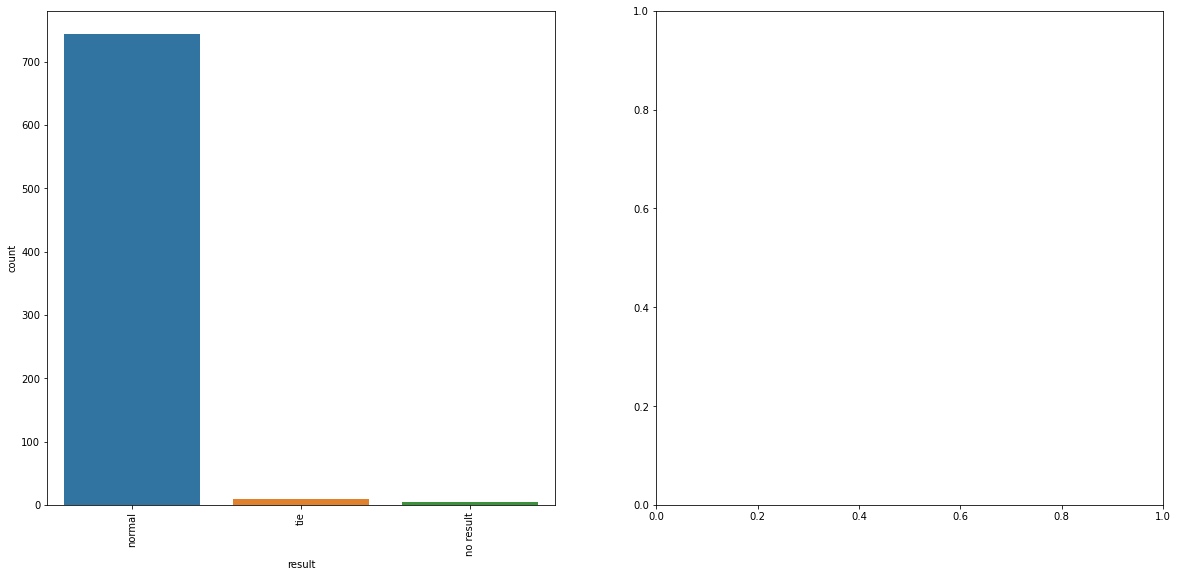

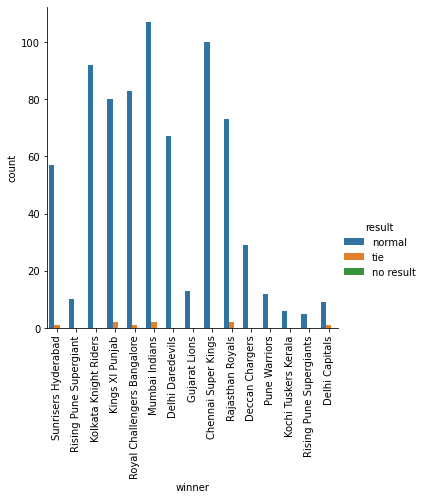

In [30]:
# visualizing the result
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['result'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x='winner', hue= 'result', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plot we can see that out of the teams who won most of the matches chennai super kings is the team who has no tie match and no no result match and after that comes the kolkata knight riders who has only normal match results.

### winner

In [31]:
match['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [32]:
match['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


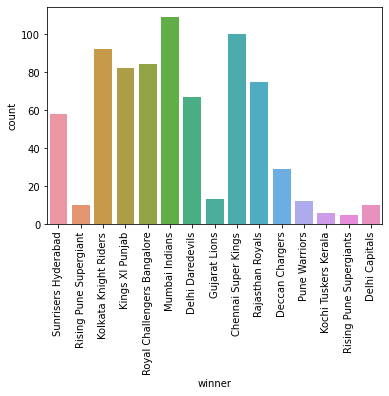

In [33]:
# visualizing the winner

sns.countplot(match['winner'])
plt.xticks(rotation= 90)
plt.show()

#### Just by looking at this column we can see that which of the teams are best out of the total number of teams and teams who have won most of the matches are the best team all over the years.

### win_by_runs

In [34]:
match['win_by_runs'].unique()

array([ 35,   0,  15,  97,  17,  51,  27,   5,  21,  14,  26,  82,   3,
        61,  48,  19,  12, 146,   7,   9,  10,  20,   1, 140,  33,   6,
        66,  13,  45,  29,  18,  23,  41,  65,  25, 105,  75,  92,  11,
        24,  38,   8,  78,  16,  53,   2,   4,  31,  55,  98,  34,  36,
        39,  40,  67,  63,  37,  57,  22,  85,  32,  76, 111,  43,  58,
        28,  74,  42,  59,  46,  47,  86,  44,  87, 130,  60,  77,  30,
        50,  93,  72,  62, 138,  71, 144,  80,  64, 102, 118], dtype=int64)

In [35]:
match['win_by_runs'].value_counts()

0      419
14      13
4       11
10      11
1       10
      ... 
64       1
66       1
67       1
72       1
146      1
Name: win_by_runs, Length: 89, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


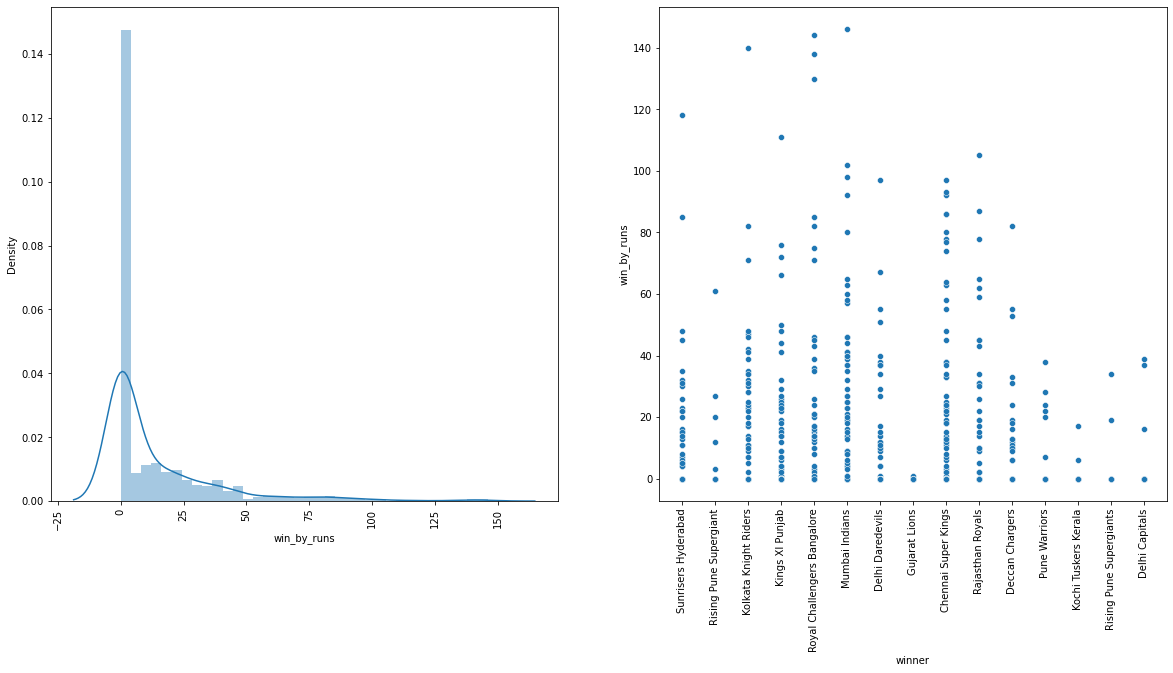

In [36]:
# visualizing the win_by_runs
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.distplot(match['win_by_runs'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'winner', y= 'win_by_runs', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plot we can see that win_by_runs are positively skewed data and by looking at the scatterplot we can see that most matches who won by runs are mumbai indians and chennai super kings. 

### win_by_wickets

In [37]:
match['win_by_wickets'].unique()

array([ 0,  7, 10,  6,  9,  4,  8,  5,  2,  3,  1], dtype=int64)

In [38]:
match['win_by_wickets'].value_counts()

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


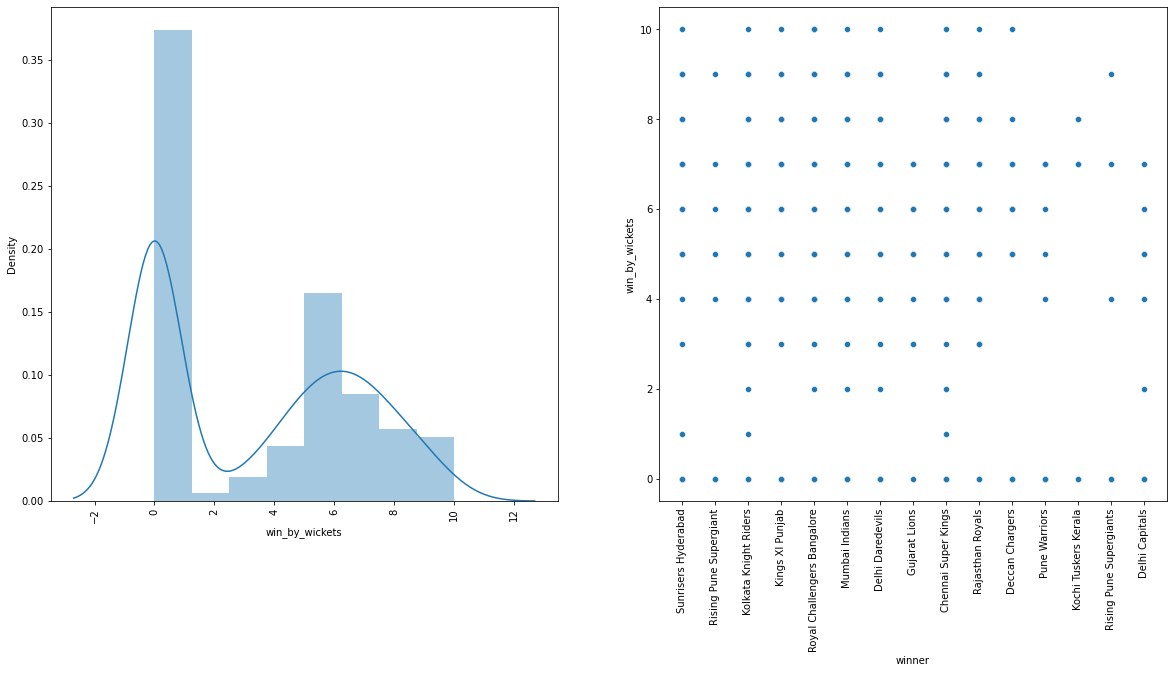

In [39]:
# visualizing the win_by_wickets
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.distplot(match['win_by_wickets'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.scatterplot(x= 'winner', y= 'win_by_wickets', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plot we can see that it is multi_skewed data and from scatterplot it very hard to deduce anything from it.

### player_of_match

In [40]:
match['player_of_match'].unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

In [41]:
match['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
                  ..
SA Asnodkar        1
NV Ojha            1
Mohammed Shami     1
MN Samuels         1
R Bhatia           1
Name: player_of_match, Length: 226, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


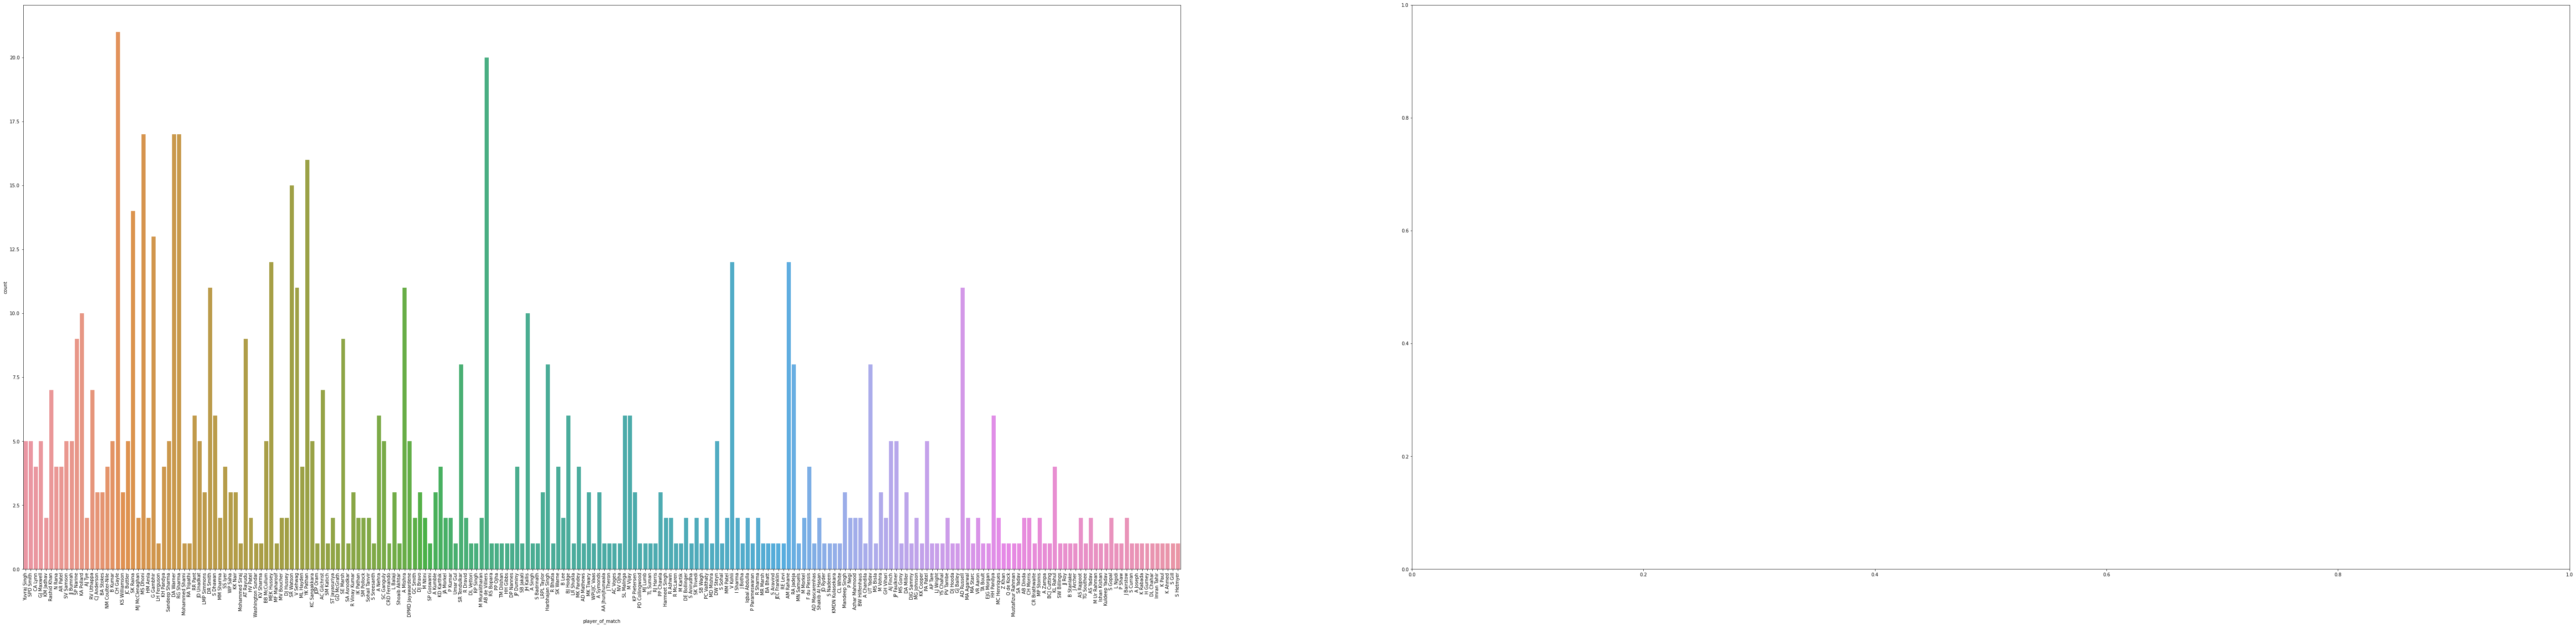

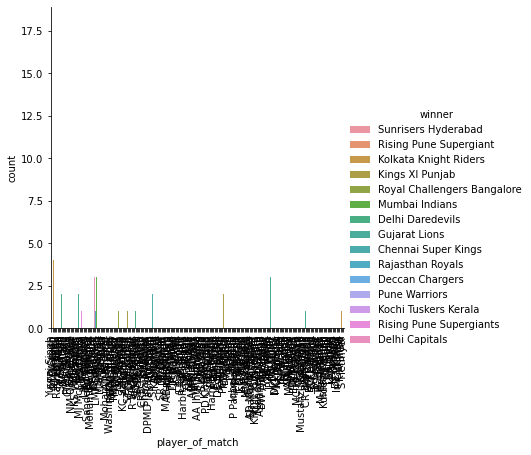

In [42]:
# visualizing the player_of_match
plt.figure(figsize= [100,50])
plt.subplot(221)
sns.countplot(match['player_of_match'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x= 'player_of_match', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### By looking at the countplot we can see that most player_of_match has been won by Chris Gayle. And from the the second countplot it is very hard to deduce as the name of the players has been jumble upon.

#### But the players who has won most of the player_of_matches can be deduce as the best players of the IPL tournament which are AB de Villiers, Virat Kohli, Ajhinkya Rahane, Ravindra Jadeja, UT Yadav, Mayank Aggarwal, DPMD Jayawardene, Virendra Sehwag, Shane Watson, Chris Gayle, MS Dhoni and David Warner.

### venue

In [43]:
match['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [44]:
match['venue'].value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


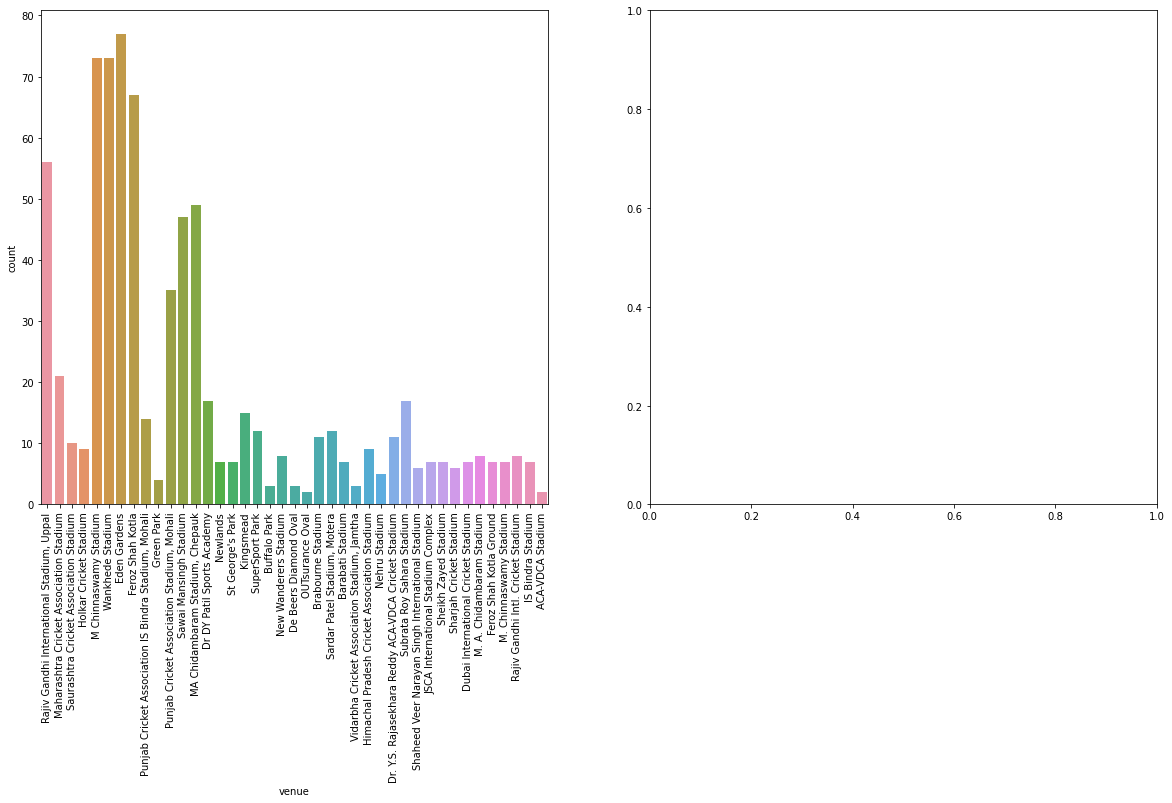

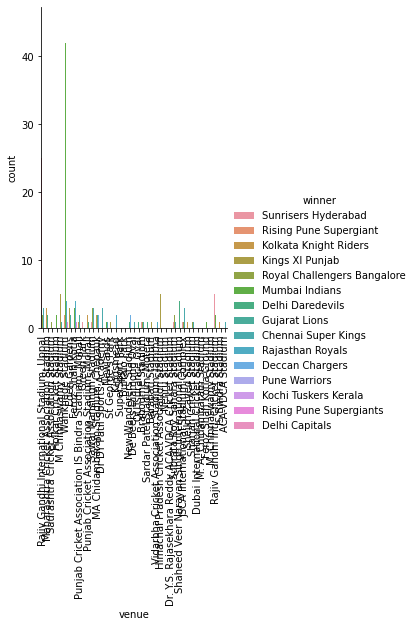

In [45]:
# visualizing the venue
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['venue'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x= 'venue', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### Most of the matches are played at the eden gardens ground. From the second plot it is very hard to deduce any thing as the it is jumbled up.

### umpire1

In [46]:
match['umpire1'].unique()

array(['AY Dandekar', 'A Nand Kishore', 'Nitin Menon', 'AK Chaudhary',
       nan, 'A Deshmukh', 'KN Ananthapadmanabhan', 'YC Barde', 'S Ravi',
       'CB Gaffaney', 'M Erasmus', 'NJ Llong', 'CK Nandan', 'Asad Rauf',
       'MR Benson', 'Aleem Dar', 'SJ Davis', 'BF Bowden', 'IL Howell',
       'DJ Harper', 'RE Koertzen', 'BR Doctrove', 'AV Jayaprakash',
       'BG Jerling', 'HDPK Dharmasena', 'S Asnani', 'GAV Baxter',
       'SS Hazare', 'K Hariharan', 'SL Shastri', 'SK Tarapore',
       'SJA Taufel', 'S Das', 'AM Saheba', 'PR Reiffel', 'JD Cloete',
       'VA Kulkarni', 'BNJ Oxenford', 'C Shamshuddin', 'RK Illingworth',
       'RM Deshpande', 'K Srinath', 'SD Fry', 'PG Pathak', 'K Bharatan',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'K Ananthapadmanabhan', 'O Nandan', 'A Nanda Kishore',
       'Vineet Kulkarni', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'Anil Dandekar', 'Yeshwant Barde', 'Ian Gould',
       'Ulhas Gandhe', 'Nan

In [47]:
match['umpire1'].value_counts()

HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
SL Shastri          1
A Nanda Kishore     1
Nanda Kishore       1
Sundaram Ravi       1
SJA Taufel          1
Name: umpire1, Length: 61, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


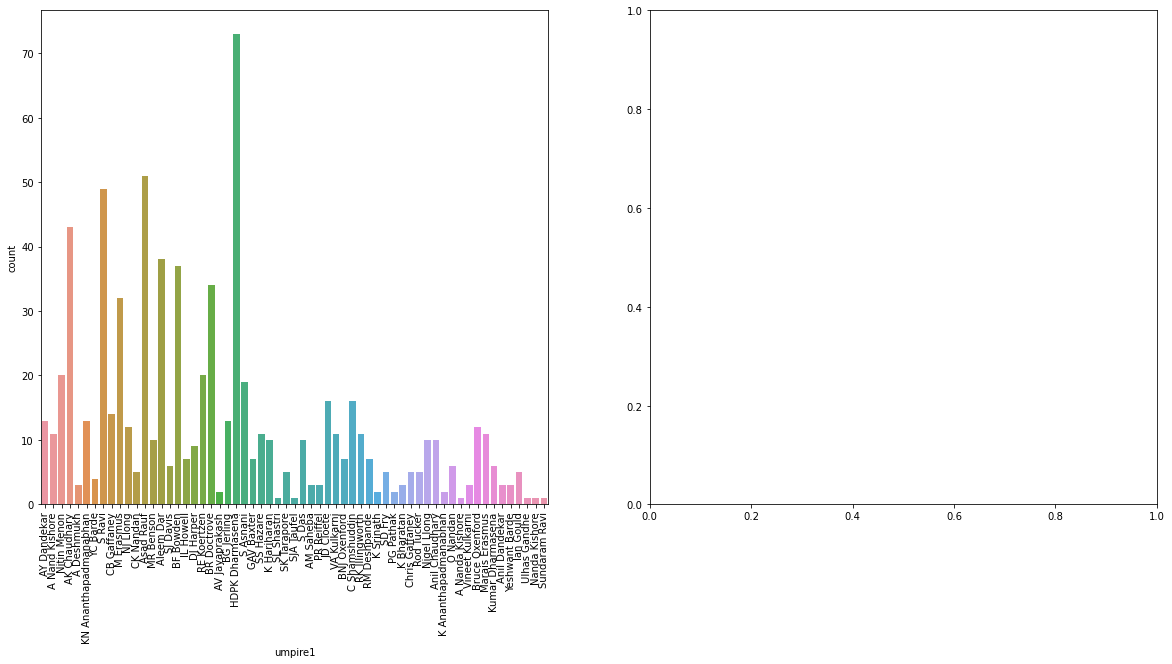

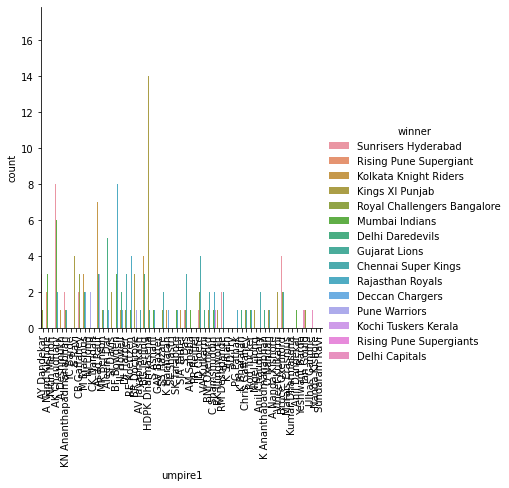

In [48]:
# visualizing the umpire1
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['umpire1'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x= 'umpire1', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### Most of the matches are umpired by kumar dharmasena. And from the second plot we cannot deduce any thing as most of the umpire's name are jumbled up.

#### But umpire doesnot affect the winning of the teams in any way possible until or unless they have fixed the match.

### umpire2

In [49]:
match['umpire2'].unique()

array(['NJ Llong', 'S Ravi', 'CK Nandan', 'C Shamshuddin', nan,
       'AK Chaudhary', 'Nitin Menon', 'A Deshmukh', 'VK Sharma',
       'M Erasmus', 'CB Gaffaney', 'A Nand Kishore', 'RE Koertzen',
       'SL Shastri', 'GA Pratapkumar', 'DJ Harper', 'K Hariharan',
       'RB Tiffin', 'AM Saheba', 'MR Benson', 'IL Howell',
       'AV Jayaprakash', 'I Shivram', 'BR Doctrove', 'BG Jerling',
       'SJ Davis', 'SD Ranade', 'SJA Taufel', 'TH Wijewardene',
       'SK Tarapore', 'HDPK Dharmasena', 'SS Hazare', 'PR Reiffel',
       'AL Hill', 'RJ Tucker', 'VA Kulkarni', 'JD Cloete', 'BNJ Oxenford',
       'S Asnani', 'S Das', 'K Srinath', 'Subroto Das', 'RK Illingworth',
       'PG Pathak', 'K Srinivasan', 'SD Fry', 'A Nanda Kishore',
       'K Ananthapadmanabhan', 'A.D Deshmukh', 'Vineet Kulkarni',
       'Chris Gaffaney', 'Rod Tucker', 'Nigel Llong', 'Anil Chaudhary',
       'O Nandan', 'Virender Kumar Sharma', 'Yeshwant Barde',
       'Anil Dandekar', 'Kumar Dharmasena', 'KN Anantapadmanabha

In [50]:
match['umpire2'].value_counts()

S Ravi                   57
C Shamshuddin            57
SJA Taufel               54
RJ Tucker                38
CK Nandan                36
                         ..
JD Cloete                 1
KN Ananthapadmanabhan     1
SJ Davis                  1
Ian Gould                 1
Nand Kishore              1
Name: umpire2, Length: 65, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


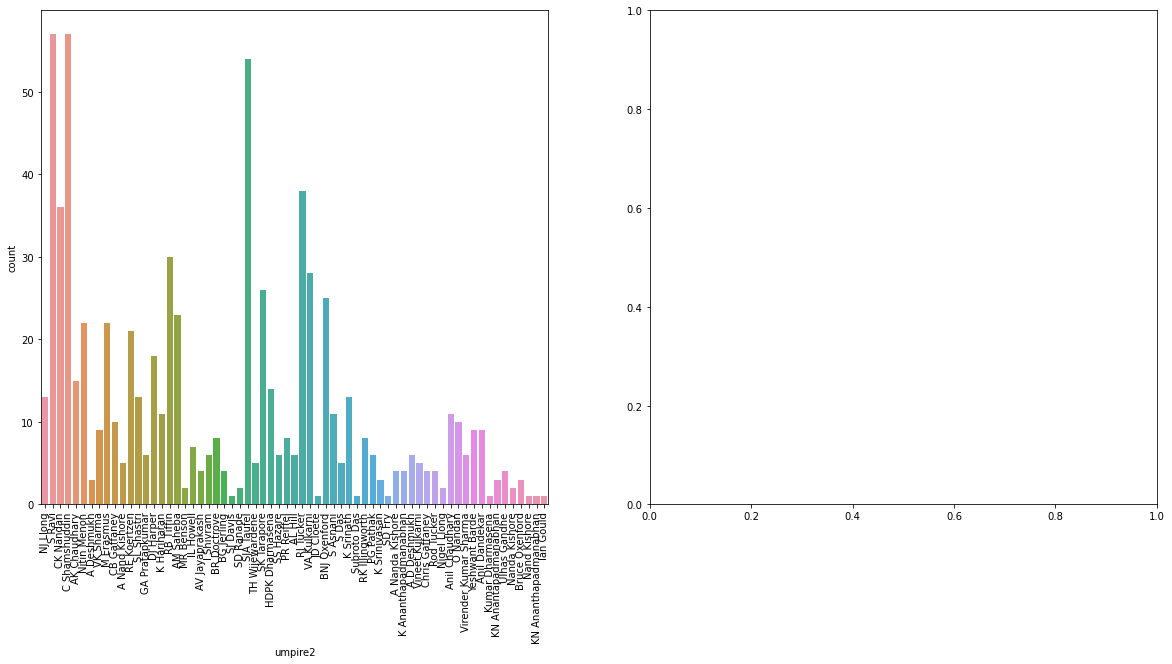

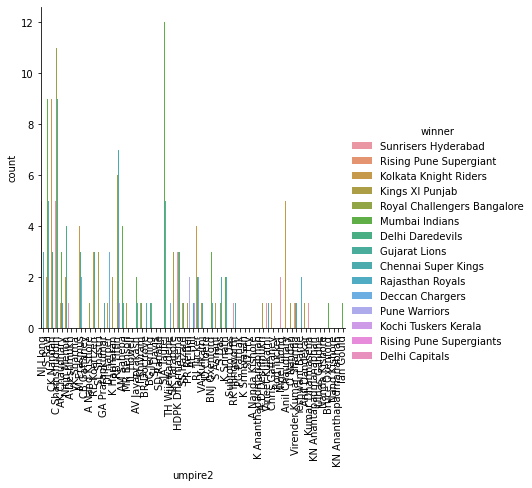

In [51]:
# visualizing umpire2
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['umpire2'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x= 'umpire2', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### From the countplot we can see that other 2 umpires who umpired the most of the matches are Shamshuddin and S Ravi. And From the other plot it cannot be deduce as the names are jumbled up.

#### It can affect the winning team in the same way as umpire1 does.

### umpire3

In [52]:
match['umpire3'].unique()

array([nan, 'Anil Chaudhary', 'Nitin Menon', 'S Ravi', 'O Nandan',
       'A Nanda Kishore', 'Vineet Kulkarni', 'C Shamshuddin',
       'Rod Tucker', 'Chris Gaffaney', 'A.D Deshmukh', 'Nigel Llong',
       'K Ananthapadmanabhan', 'Anil Dandekar', 'Virender Kumar Sharma',
       'Yeshwant Barde', 'Bruce Oxenford', 'Marais Erasmus',
       'Kumar Dharmasena', 'KN Anantapadmanabhan', 'Ulhas Gandhe',
       'Nanda Kishore', 'Ian Gould', 'Sundaram Ravi',
       'KN Ananthapadmanabhan', 'Chettithody Shamshuddin'], dtype=object)

In [53]:
match['umpire3'].value_counts()

C Shamshuddin              10
O Nandan                   10
Nitin Menon                10
Anil Chaudhary              9
S Ravi                      8
Vineet Kulkarni             8
Bruce Oxenford              7
Yeshwant Barde              7
Anil Dandekar               7
Chris Gaffaney              6
Rod Tucker                  5
Marais Erasmus              5
Nigel Llong                 4
Nanda Kishore               3
Ian Gould                   3
A Nanda Kishore             3
Kumar Dharmasena            2
Virender Kumar Sharma       2
A.D Deshmukh                2
Ulhas Gandhe                2
K Ananthapadmanabhan        2
Chettithody Shamshuddin     1
KN Ananthapadmanabhan       1
KN Anantapadmanabhan        1
Sundaram Ravi               1
Name: umpire3, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


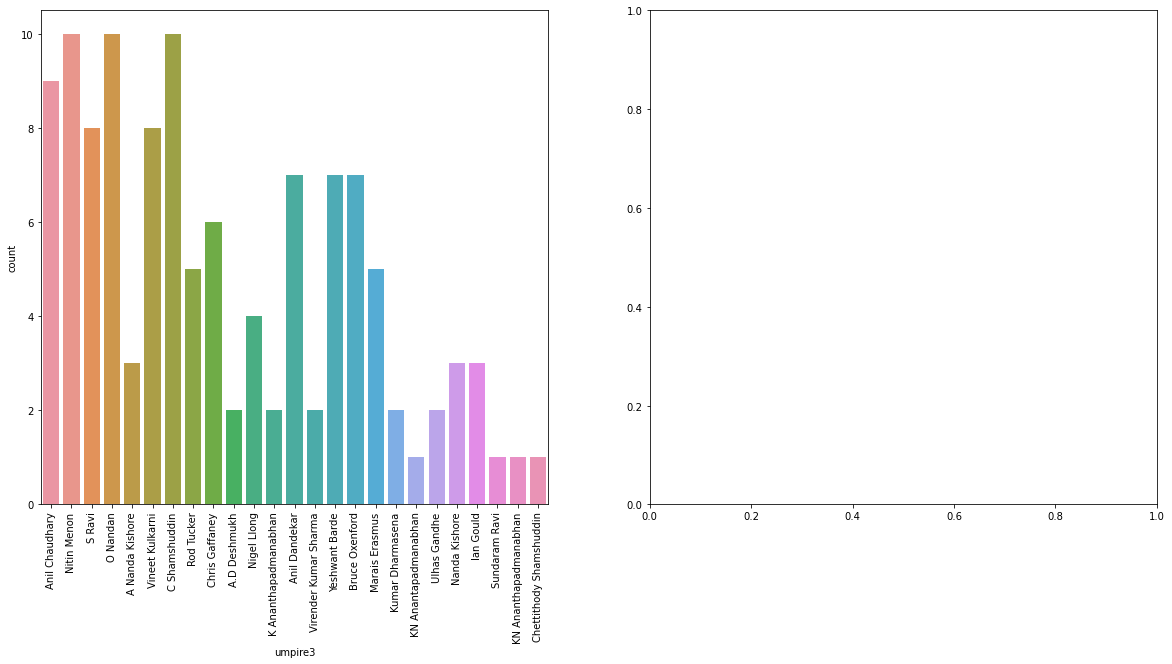

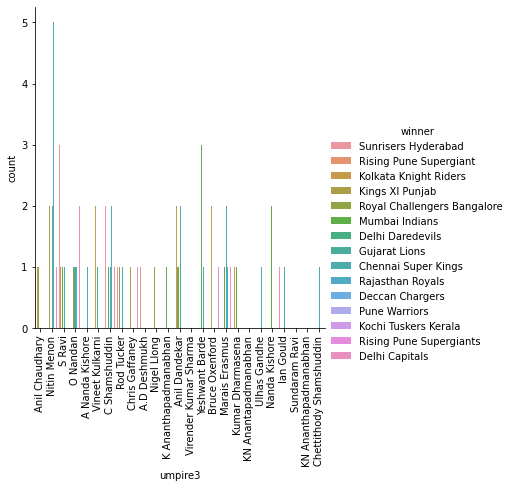

In [54]:
# Visualizing umpire3
plt.figure(figsize= [20,20])
plt.subplot(221)
sns.countplot(match['umpire3'])
plt.xticks(rotation= 90)
plt.subplot(222)
sns.catplot(x= 'umpire3', hue= 'winner', kind= 'count', data= match)
plt.xticks(rotation= 90)
plt.show()

#### Most of the matches that are get 3rd umpire by are menon, nandan and shamshuddin. From the second plot we cannot deduce any thing as the skyscappers are very close and very slim to know anything.

#### #rd umpire are most important because they solve the any confusion that are created by moments like runout. Apart from that they doesnot affect the winning of the matches in any way.

In [55]:
match.isnull().sum()

season               0
city                 7
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [56]:
match['city'] = match['city'].fillna(method= 'bfill')
match['winner'] = match['winner'].fillna(method= 'bfill')
match['player_of_match'] = match['player_of_match'].fillna(method= 'bfill')
match['umpire1'] = match['umpire1'].fillna(method= 'bfill')
match['umpire2'] = match['umpire2'].fillna(method= 'bfill')
match['umpire3'] = match['umpire3'].fillna(method= 'bfill')

In [57]:
match.isnull().sum()

season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

## Working on ball dataset 

In [58]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [59]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [60]:
ball.shape

(179078, 21)

In [61]:
# null values 
ball.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [62]:
ball['batsman_runs'].unique()

array([0, 4, 1, 6, 3, 2, 5, 7], dtype=int64)

#### As any batsmen run are not greater then 7 so I am assuming that all the batsmen got dismissed in some way

In [63]:
ball['player_dismissed'] = ball['player_dismissed'].fillna(ball['batsman'])

In [64]:
ball.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed         0
dismissal_kind      170244
fielder             172630
dtype: int64

In [65]:
ball['dismissal_kind'] = ball['dismissal_kind'].fillna(method= 'bfill')

In [66]:
ball['dismissal_kind'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [67]:
ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,DA Warner,caught,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,DA Warner,caught,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,DA Warner,caught,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,DA Warner,caught,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,DA Warner,caught,NaN


## Starting the EDA

### match_id

In [68]:
ball['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

#### match_id does not affect the dismissal of the batsmen in any way. So, it can be dropped.

In [69]:
ball.drop(['match_id'], axis= 1, inplace= True)

### inning

In [70]:
ball['inning'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [71]:
ball['inning'].value_counts()

1    92742
2    86240
3       50
4       38
5        8
Name: inning, dtype: int64

#### inning column does not make any sense as some of the values are more than 2 but in an IPL match there can be only 2 inning that can happen. Also it does not affect the dismissal in any way. It can be dropped also.

In [72]:
ball.drop(['inning'], axis= 1, inplace= True)

### batting_team

In [73]:
ball['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


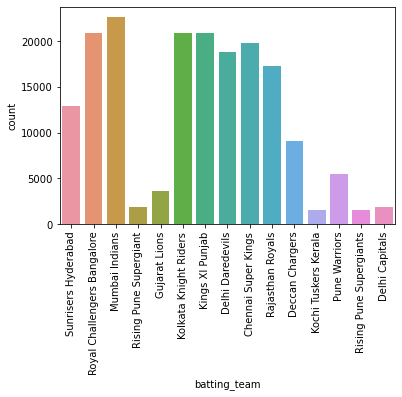

In [74]:
# visualizing the batting_team
sns.countplot(ball['batting_team'])
plt.xticks(rotation= 90)
plt.show()

 #### From the plot we can see that in this dataset Mumbai Indians players has done batting than ay other players of the other teams.

### bowling_team

In [75]:
ball['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


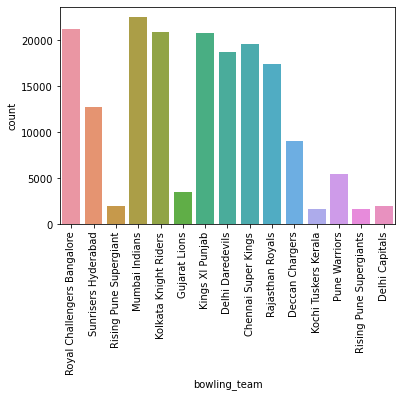

In [76]:
# visualizing the bowling_team
sns.countplot(ball['bowling_team'])
plt.xticks(rotation= 90)
plt.show()

#### We can see from this plot that most of the players who bowled in a matches are from the Mumbai Indians than any other team.

### over

In [77]:
ball['over'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


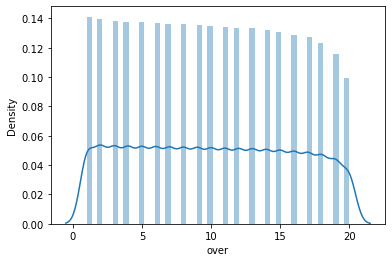

In [78]:
# visualizing the over
sns.distplot(ball['over'])
plt.show()

#### From the plot we can see that most of the batsmen got out in the first over and plot is not perfectly skewed in any direction.

### ball

In [79]:
ball['ball'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


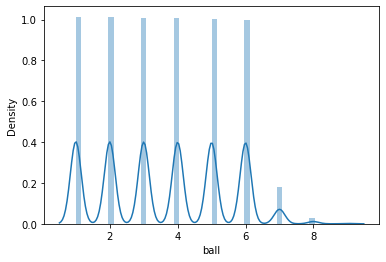

In [80]:
# visualizing the ball

sns.distplot(ball['ball'])
plt.show()

#### From the plot we can see that most players got out on the first ball of the over. Also the data shows that it is multi skewed data.

### batsman

In [81]:
ball['batsman'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [82]:
ball['batsman'].value_counts()

V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
                  ... 
P Raj                1
C Nanda              1
V Pratap Singh       1
DP Vijaykumar        1
S Lamichhane         1
Name: batsman, Length: 516, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


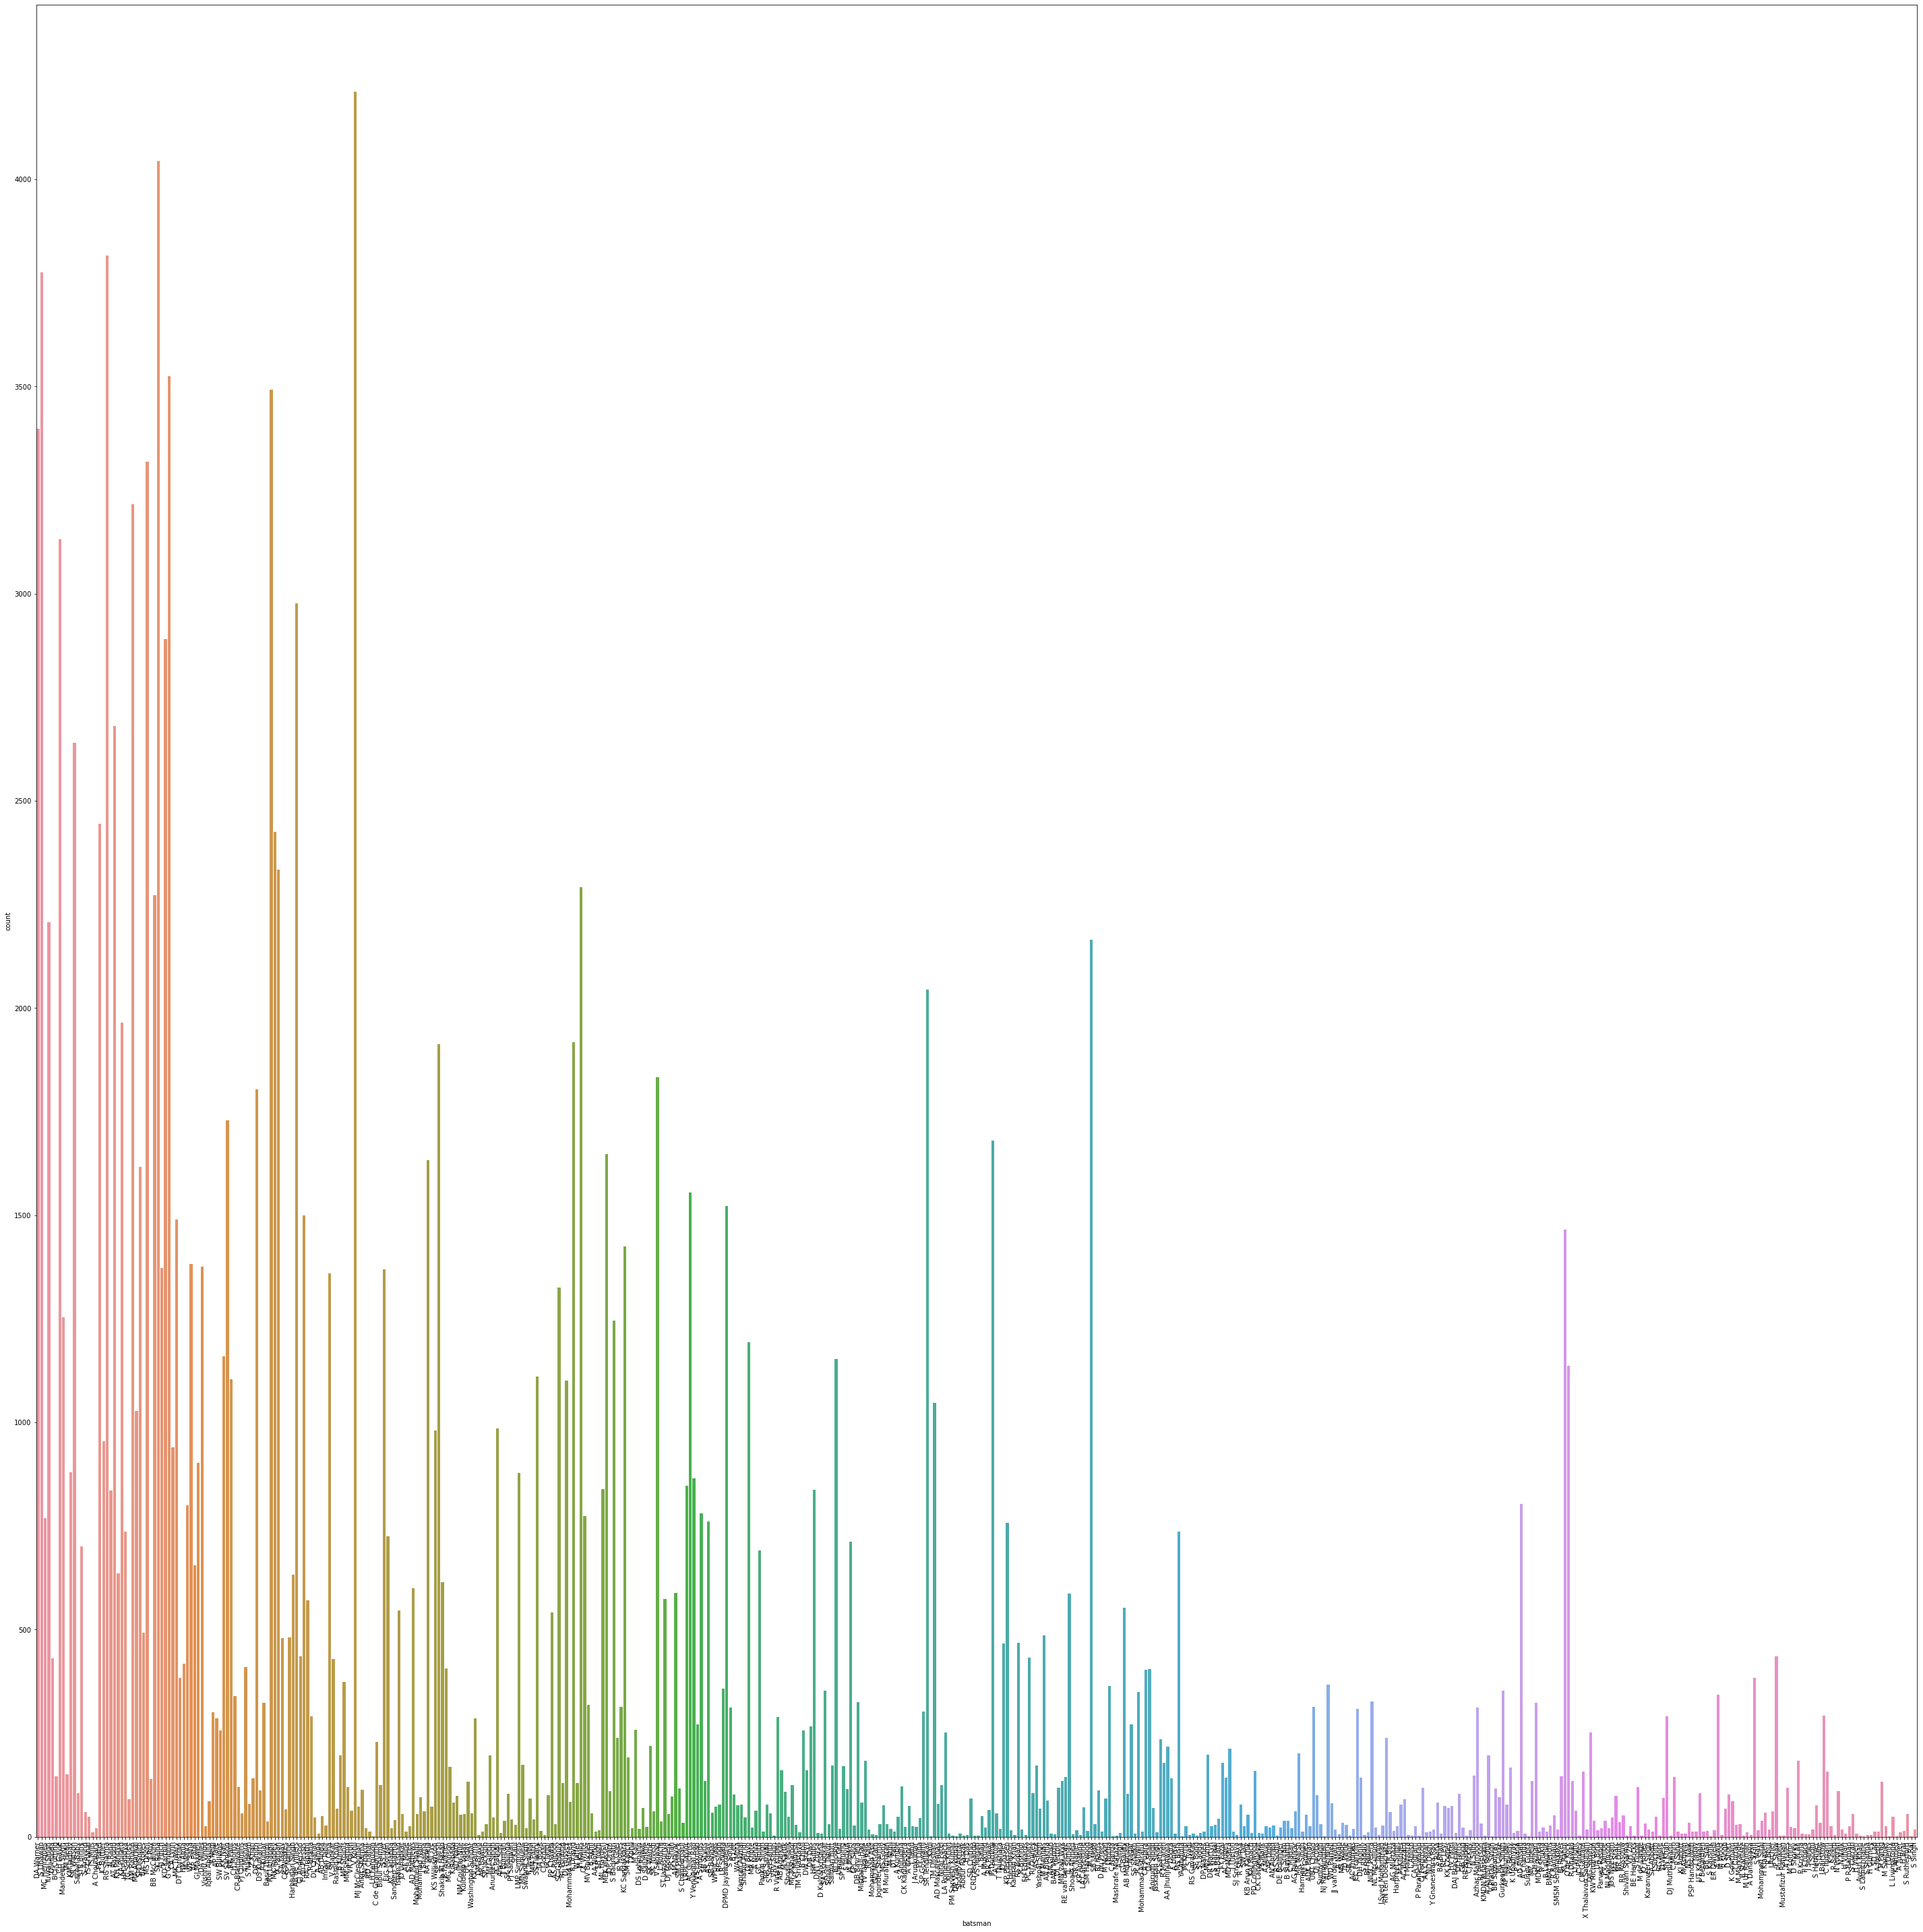

In [83]:
# Visualizing the batsman
plt.figure(figsize= [50,50])
sns.countplot(ball['batsman'])
plt.xticks(rotation= 90)
plt.show()

#### From the plot we get the visualization but we cannot get the players name who played most of the as batsmen in the matches but from the value_count() we get that players name which is Virat Kohli

### non_striker

In [84]:
ball['non_striker'].unique()

array(['S Dhawan', 'DA Warner', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'Mandeep Singh', 'CH Gayle', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'TS Mills', 'YS Chahal', 'A Choudhary', 'JC Buttler', 'PA Patel',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'MJ McClenaghan', 'MA Agarwal',
       'AM Rahane', 'SPD Smith', 'BA Stokes', 'MS Dhoni', 'BB McCullum',
       'JJ Roy', 'SK Raina', 'AJ Finch', 'KD Karthik', 'DR Smith',
       'CA Lynn', 'G Gambhir', 'MK Tiwary', 'DT Christian', 'R Bhatia',
       'M Vohra', 'HM Amla', 'WP Saha', 'AR Patel', 'GJ Maxwell',
       'DA Miller', 'Vishnu Vinod', 'P Negi', 'Iqbal Abdulla',
       'SW Billings', 'AP Tare', 'KK Nair', 'SV Samson', 'RR Pant',
       'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra', 'Z Khan',
       'DS Kulkarni', 'P Kumar', 'Basil Thampi', 'MK Pandey', 'YK Pathan',
       'SA Yadav', 'CR

In [85]:
ball['non_striker'].value_counts()

SK Raina            4173
S Dhawan            4090
V Kohli             4071
RG Sharma           3858
G Gambhir           3740
                    ... 
C Ganapathy            2
S Randiv               1
TP Sudhindra           1
PM Sarvesh Kumar       1
BW Hilfenhaus          1
Name: non_striker, Length: 511, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


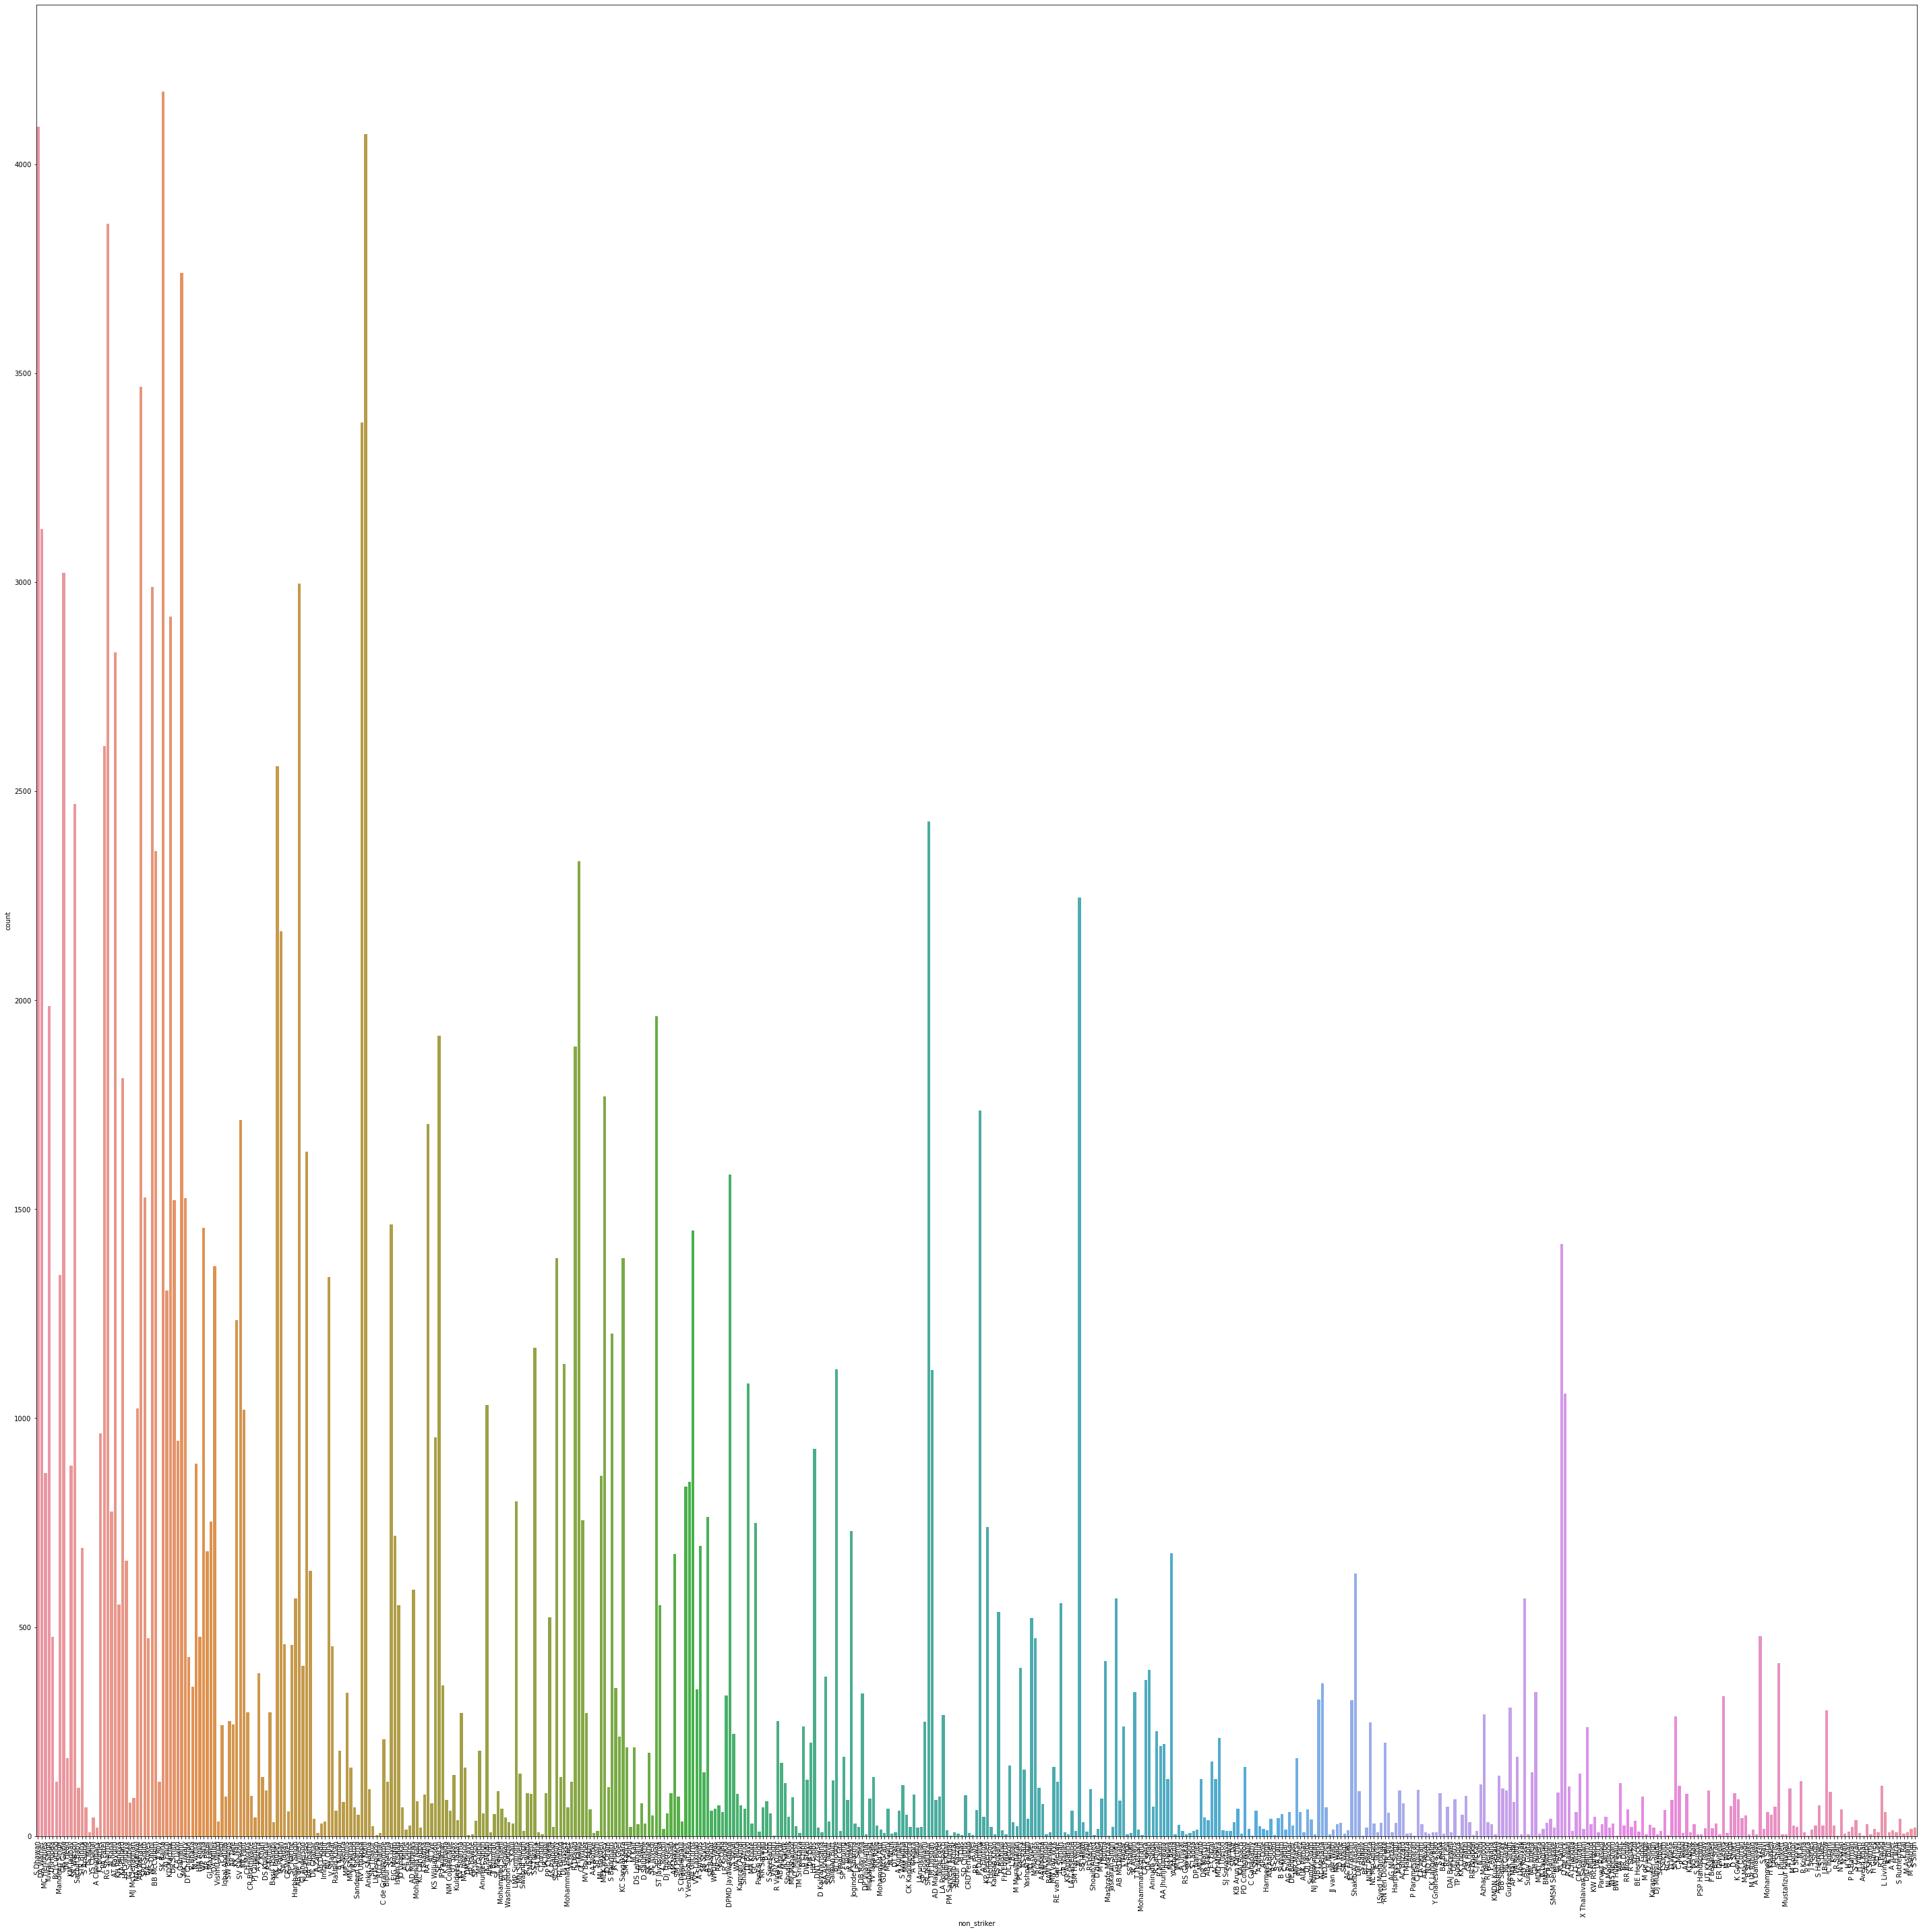

In [86]:
plt.figure(figsize= [50,50])
sns.countplot(ball['non_striker'])
plt.xticks(rotation= 90)
plt.show()

#### From the plot we can get the visualization but cannot get the name as it got jumbled but form the value_counts() we get the name which is SK Raina

### bowler

In [87]:
ball['bowler'].unique()

array(['TS Mills', 'A Choudhary', 'YS Chahal', 'S Aravind', 'SR Watson',
       'TM Head', 'STR Binny', 'A Nehra', 'B Kumar', 'BCJ Cutting',
       'Rashid Khan', 'DJ Hooda', 'MC Henriques', 'Bipul Sharma',
       'AB Dinda', 'DL Chahar', 'BA Stokes', 'Imran Tahir', 'A Zampa',
       'R Bhatia', 'TG Southee', 'HH Pandya', 'MJ McClenaghan',
       'JJ Bumrah', 'KH Pandya', 'KA Pollard', 'TA Boult', 'PP Chawla',
       'SP Narine', 'CR Woakes', 'Kuldeep Yadav', 'YK Pathan', 'P Kumar',
       'DS Kulkarni', 'MS Gony', 'S Kaushik', 'DR Smith', 'SB Jakati',
       'Sandeep Sharma', 'MM Sharma', 'AR Patel', 'T Natarajan',
       'MP Stoinis', 'Swapnil Singh', 'DT Christian', 'RD Chahar',
       'Z Khan', 'CH Morris', 'PJ Cummins', 'S Nadeem', 'A Mishra',
       'CR Brathwaite', 'B Stanlake', 'Iqbal Abdulla', 'P Negi',
       'SK Raina', 'Tejas Baroka', 'Basil Thampi', 'SL Malinga',
       'Harbhajan Singh', 'AS Rajpoot', 'VR Aaron', 'CJ Anderson',
       'Mustafizur Rahman', 'UT Yadav', 'C d

In [88]:
ball['bowler'].value_counts()

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
                   ... 
P Prasanth            6
B Chipli              6
SN Khan               2
SPD Smith             2
AC Gilchrist          1
Name: bowler, Length: 405, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


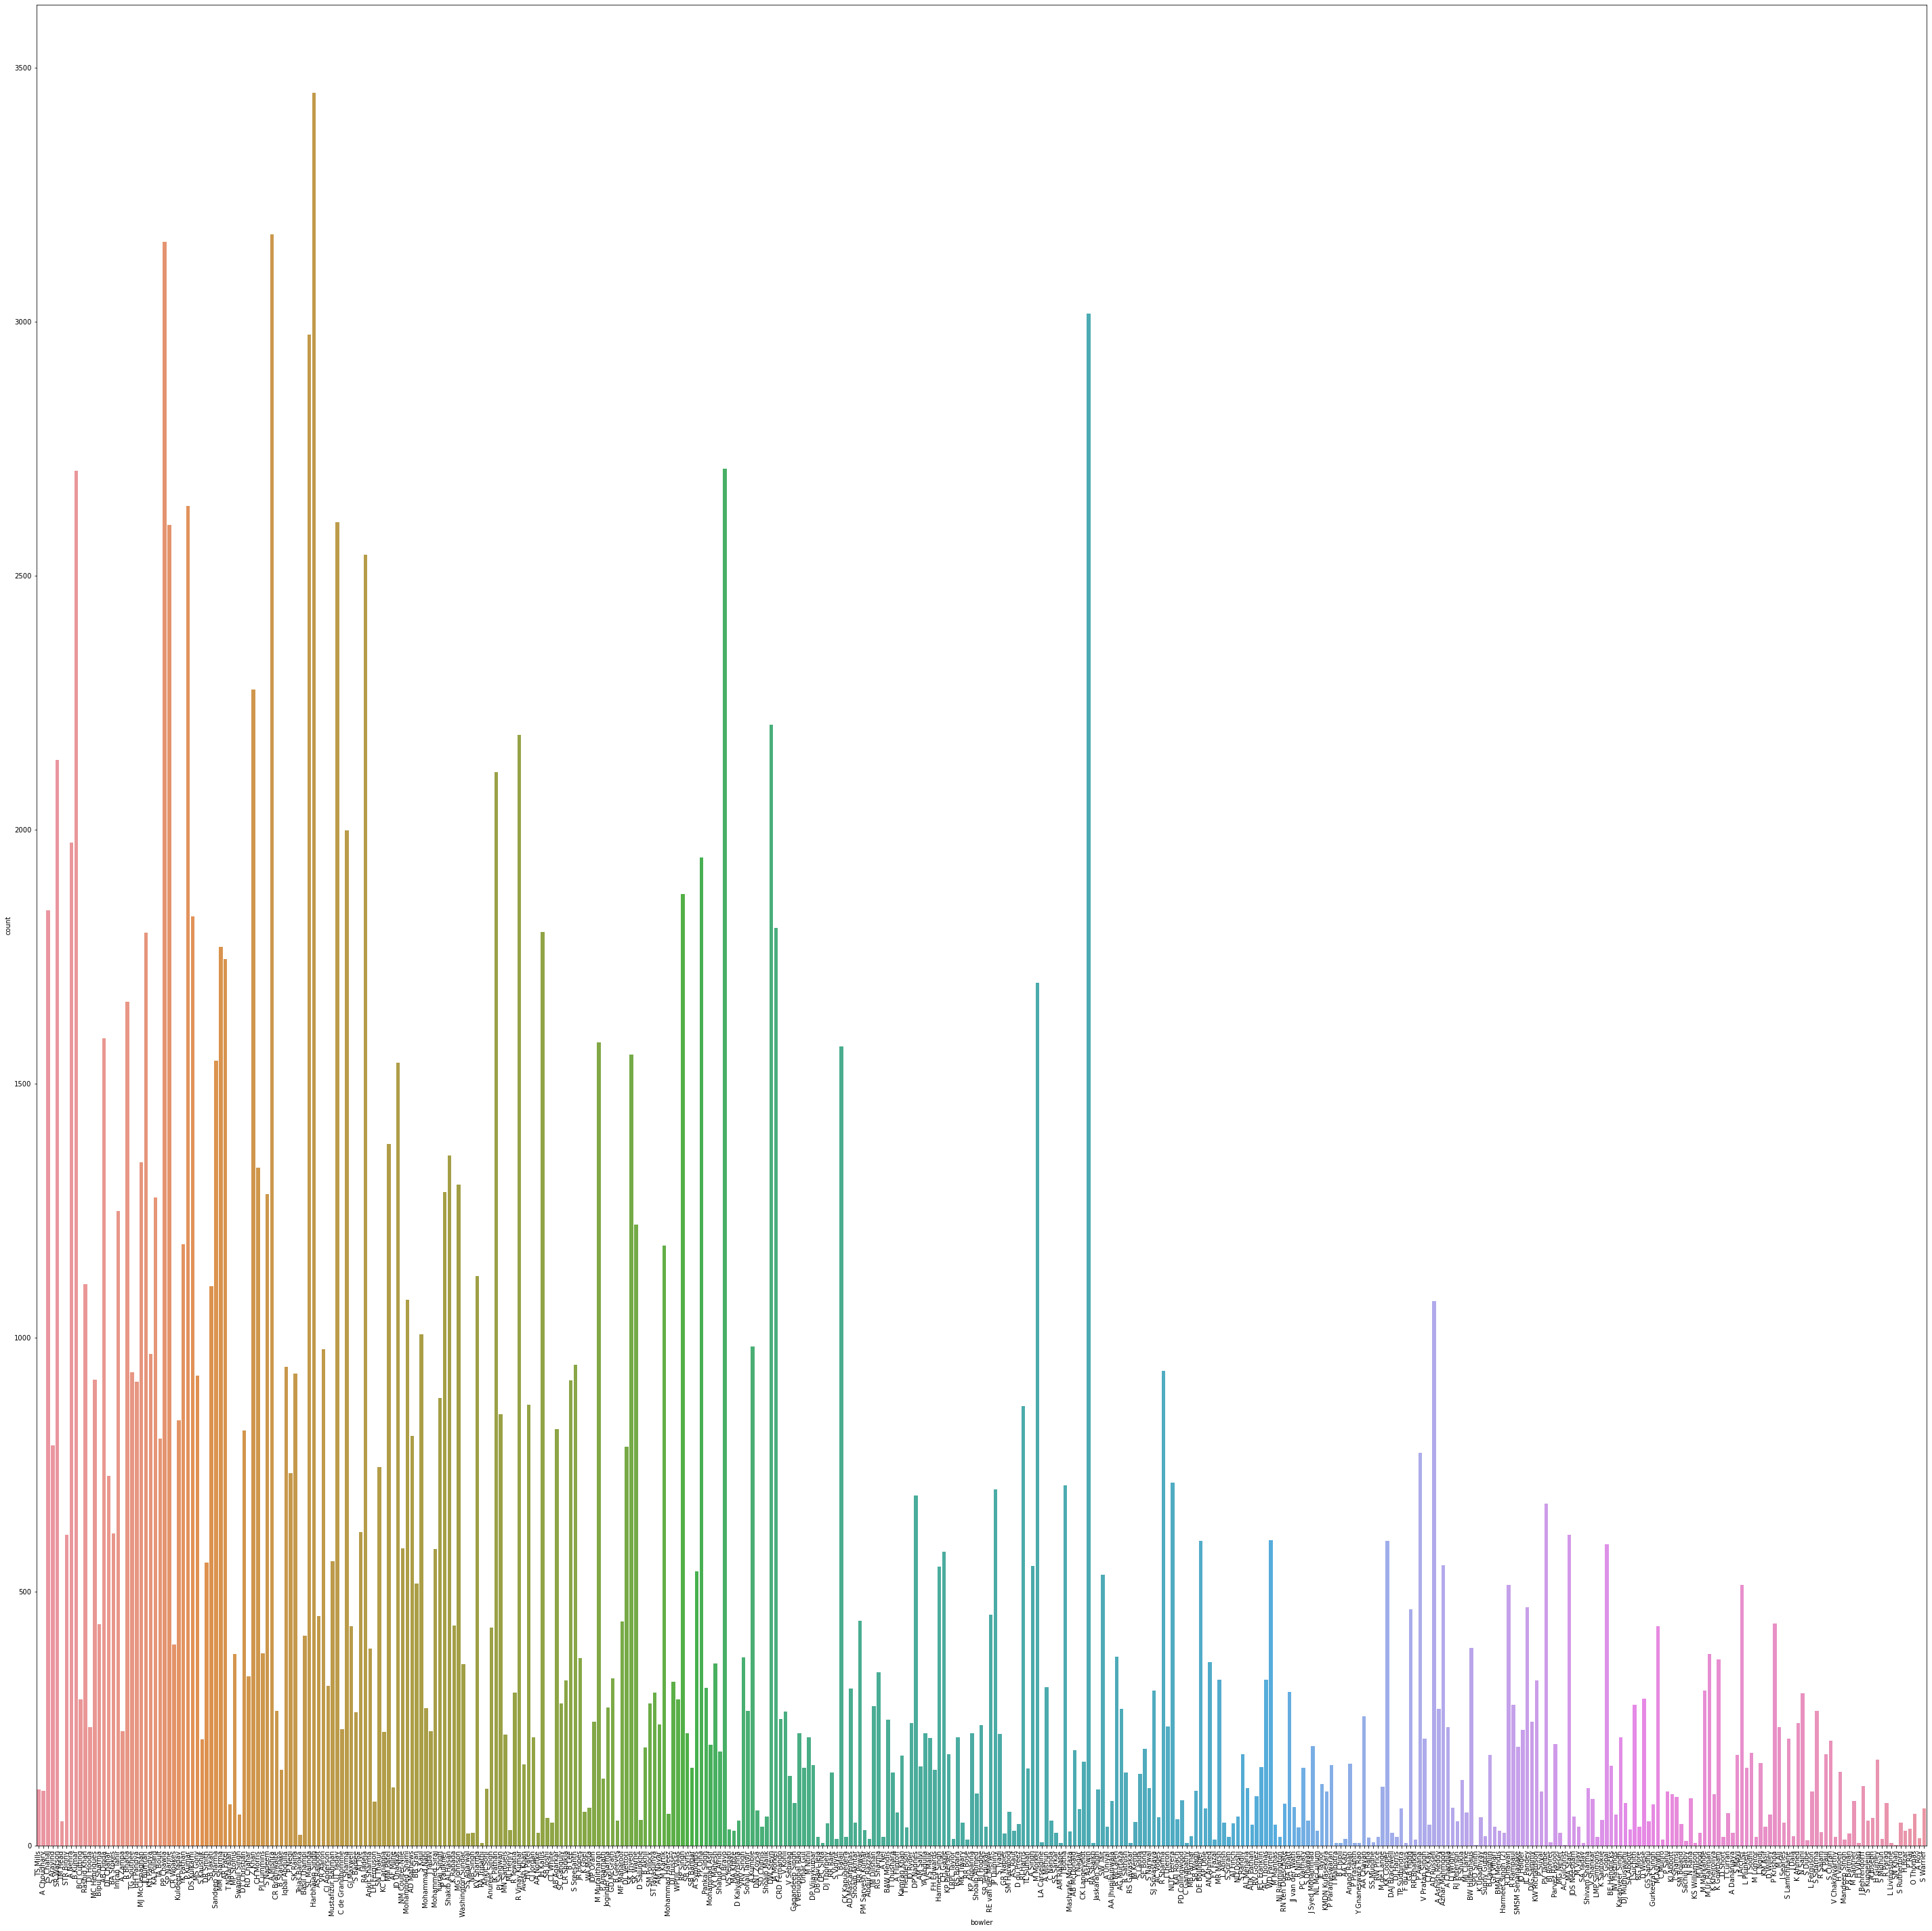

In [89]:
# visualizing the bowler
plt.figure(figsize= [50,50])
sns.countplot(ball['bowler'])
plt.xticks(rotation= 90)
plt.show()

#### From the plot we can see the visualization but cannot get the name as they are jumbled up but from the value_counts() we can see that H Singh is the bowler who bowled most of the batsmen. Also top 4 bowler who get the wickets are all the spinners.

### is_super_over

In [90]:
ball['is_super_over'].unique()

array([0, 1], dtype=int64)

In [91]:
ball['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


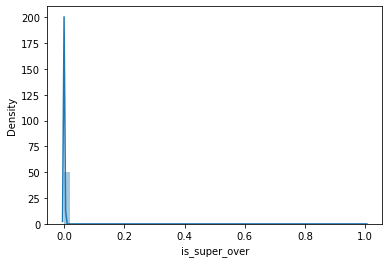

In [92]:
# visualizing the is_super_over
sns.distplot(ball['is_super_over'])
plt.show()

#### From the plot we can see that data is positively skewed and from the value_counts() we can see thatout of all the matches only 81 matches got the result by super over.

### wide_runs

In [93]:
ball['wide_runs'].unique()

array([0, 2, 1, 5, 3, 4], dtype=int64)

In [94]:
ball['wide_runs'].value_counts()

0    173673
1      4915
2       230
5       208
3        47
4         5
Name: wide_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


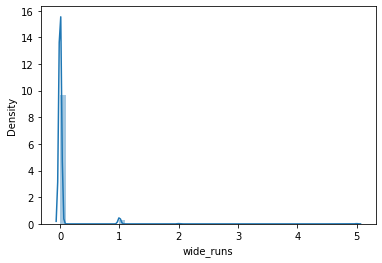

In [95]:
# visualizing the wide_runs

sns.distplot(ball['wide_runs'])
plt.show()

#### From the plot we can see that data is positively skewed and most of the matches are with zero wide runs. But it does not affect the dismissal in anyway.

### bye_runs

In [96]:
ball['bye_runs'].unique()

array([0, 1, 4, 2, 3], dtype=int64)

In [97]:
ball['bye_runs'].value_counts()

0    178598
1       324
4       123
2        31
3         2
Name: bye_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


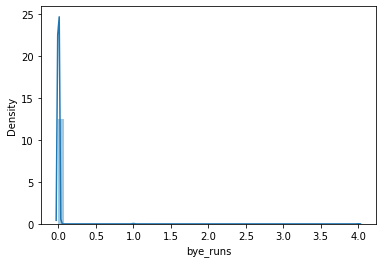

In [98]:
# visualizing the bye_runs

sns.distplot(ball['bye_runs'])
plt.show()

#### From the plot we can see that data is positively skewedand most of the matches are of zero bye runs. Also it doesnot affect dismissal in anyway.

### legbye_runs

In [99]:
ball['legbye_runs'].unique()

array([0, 1, 2, 5, 3, 4], dtype=int64)

In [100]:
ball['legbye_runs'].value_counts()

0    176141
1      2558
4       220
2       138
3        17
5         4
Name: legbye_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


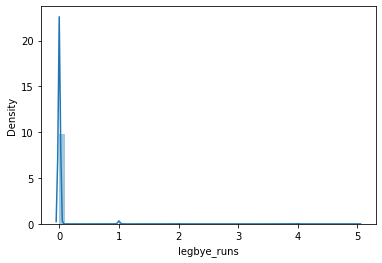

In [101]:
# visualizing the legbye_runs

sns.distplot(ball['legbye_runs'])
plt.show()

#### From the plot we can see that data is positively skewed and most of the matches are with zero legbye runs goes by. Also this does not affect the dismissal in anyway.

### noball_runs

In [102]:
ball['noball_runs'].unique()

array([0, 1, 2, 5, 3], dtype=int64)

In [103]:
ball['noball_runs'].value_counts()

0    178364
1       698
2         9
5         6
3         1
Name: noball_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


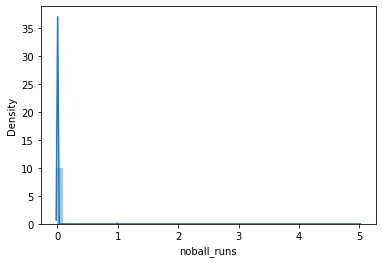

In [104]:
# Visualizing the noball_runs

sns.distplot(ball['noball_runs'])
plt.show()

#### From the plot we can see that data is positively skewed and most of the matches goes by zero noball runs. Also it does not affect the dismissal in anyway.

### penalty_runs

In [105]:
ball['penalty_runs'].unique()

array([0, 5], dtype=int64)

In [106]:
ball['penalty_runs'].value_counts()

0    179076
5         2
Name: penalty_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


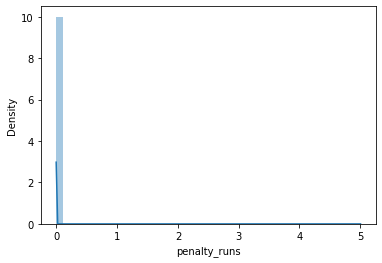

In [107]:
# visualizing the penalty_runs

sns.distplot(ball['penalty_runs'])
plt.show()

#### From the plot we can see that data is positively skewed and most of the matches are goes by zero penalty runs. Also it does not affect the dismissal in anyway.

### extra_runs

In [108]:
ball['extra_runs'].unique()

array([0, 2, 1, 4, 5, 3, 7], dtype=int64)

In [109]:
ball['extra_runs'].value_counts()

0    169541
1      8495
2       407
4       348
5       219
3        67
7         1
Name: extra_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


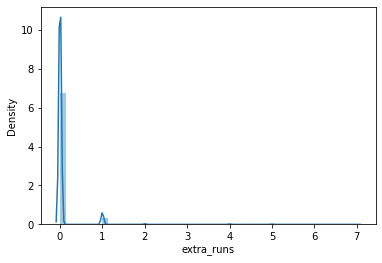

In [110]:
# visualizing the extra_runs

sns.distplot(ball['extra_runs'])
plt.show()

#### from the plot we can see that data is mostly positively skewed as there is also one more small spike alongside with it. Also it does not affect the dismissal in ayway.

### total_runs

In [111]:
ball['total_runs'].unique()

array([ 0,  4,  2,  1,  6,  3,  5,  7, 10,  8], dtype=int64)

In [112]:
ball['total_runs'].value_counts()

1     73059
0     63002
4     20599
2     13125
6      8148
3       688
5       339
8        64
7        38
10       16
Name: total_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


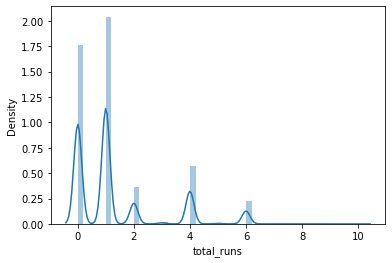

In [113]:
# visualizing the total_runs

sns.distplot(ball['total_runs'])
plt.show()

#### From the plot we can see that data is multi skewed and most of the matches goes by 1 total extra run. Also it does not affect the dismissal in anyway.

### batsman_runs

In [114]:
ball['batsman_runs'].unique()

array([0, 4, 1, 6, 3, 2, 5, 7], dtype=int64)

In [115]:
ball['batsman_runs'].value_counts()

0    70845
1    67523
4    20392
2    11471
6     8170
3      587
5       79
7       11
Name: batsman_runs, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


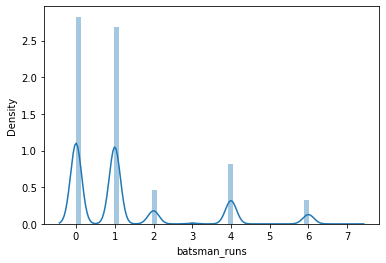

In [116]:
# visualizing the batsman_runs

sns.distplot(ball['batsman_runs'])
plt.show()

#### From the plot we can see that data is multi skewed and most of the batsman got zero runs before gets dismissed.

### player_dismissed

In [117]:
ball['player_dismissed'].unique()

array(['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuvraj Singh',
       'DJ Hooda', 'BCJ Cutting', 'CH Gayle', 'Mandeep Singh', 'TM Head',
       'KM Jadhav', 'SR Watson', 'Sachin Baby', 'STR Binny', 'S Aravind',
       'YS Chahal', 'TS Mills', 'A Choudhary', 'PA Patel', 'JC Buttler',
       'RG Sharma', 'N Rana', 'AT Rayudu', 'KH Pandya', 'KA Pollard',
       'HH Pandya', 'TG Southee', 'AM Rahane', 'MA Agarwal', 'SPD Smith',
       'BA Stokes', 'MS Dhoni', 'JJ Roy', 'BB McCullum', 'SK Raina',
       'AJ Finch', 'KD Karthik', 'G Gambhir', 'CA Lynn', 'MK Tiwary',
       'DT Christian', 'HM Amla', 'M Vohra', 'WP Saha', 'AR Patel',
       'GJ Maxwell', 'DA Miller', 'Vishnu Vinod', 'Iqbal Abdulla',
       'P Negi', 'AP Tare', 'SW Billings', 'KK Nair', 'SV Samson',
       'RR Pant', 'CH Morris', 'CR Brathwaite', 'PJ Cummins', 'A Mishra',
       'S Nadeem', 'Z Khan', 'DR Smith', 'DS Kulkarni', 'P Kumar',
       'Basil Thampi', 'RV Uthappa', 'MK Pandey', 'YK Pathan', 'SA Yadav',
       'CR Woa

In [118]:
ball['player_dismissed'].value_counts()

V Kohli         4202
SK Raina        4045
RG Sharma       3809
S Dhawan        3776
G Gambhir       3525
                ... 
U Kaul             1
J Denly            1
RR Bhatkal         1
S Lamichhane       1
C Nanda            1
Name: player_dismissed, Length: 517, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


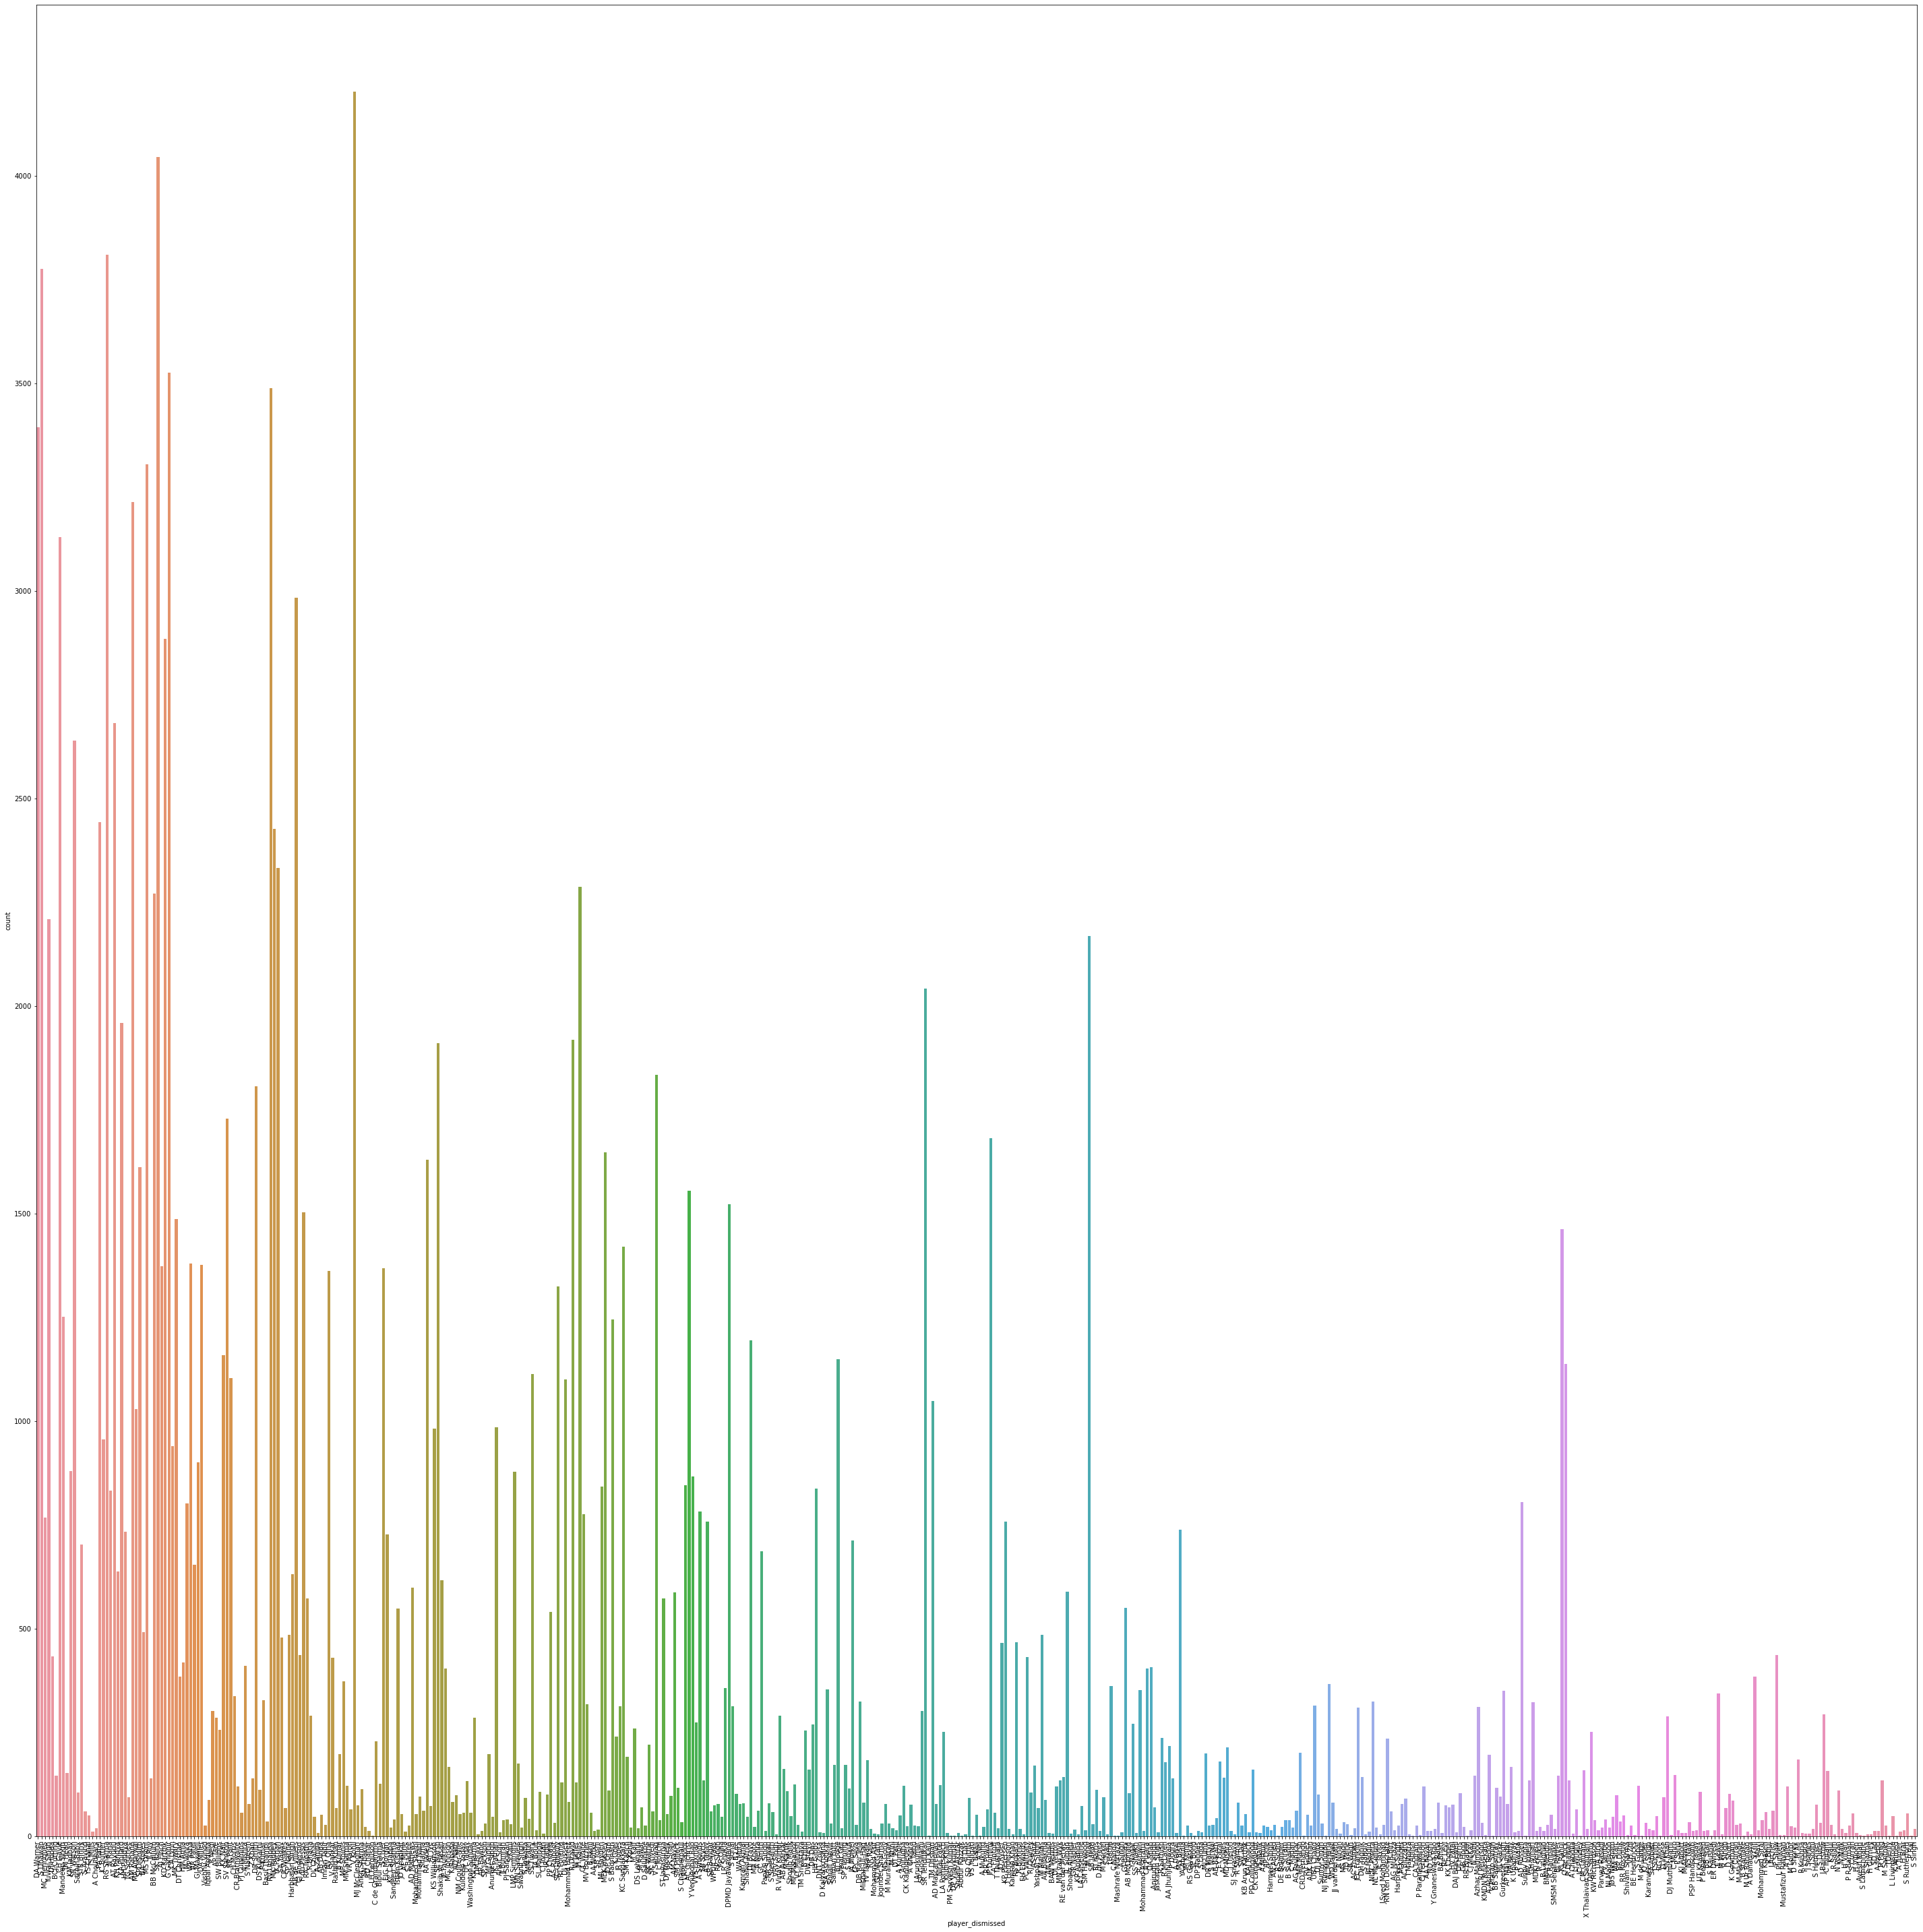

In [119]:
# visualization of player dismissed
plt.figure(figsize= [50,50])
sns.countplot(ball['player_dismissed'])
plt.xticks(rotation= 90)
plt.show()

#### By looking at the plot we can see the visualization of the data but name cannot be found as names are jumbled up but from value_counts() we get that most of the batsman dismissed is V Kohli.

### dismissal_kind

In [120]:
ball['dismissal_kind'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [121]:
ball['dismissal_kind'].value_counts()

caught                   110953
bowled                    31500
run out                   15093
lbw                       10201
stumped                    6331
caught and bowled          4545
hit wicket                  226
retired hurt                214
obstructing the field        15
Name: dismissal_kind, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


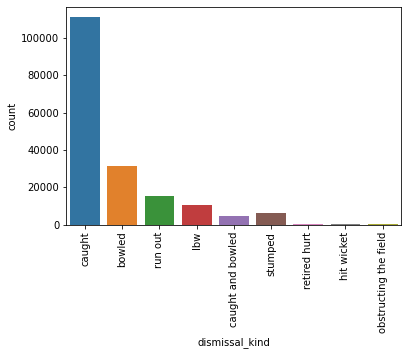

In [122]:
# visualization of dismissal_kind

sns.countplot(ball['dismissal_kind'])
plt.xticks(rotation= 90)
plt.show()

#### From the plot we can see that most of the batsmen that got dismissed are by caught.

### fielder

In [123]:
ball['fielder'].unique()

array([nan, 'Mandeep Singh', 'Sachin Baby', 'DA Warner', 'BCJ Cutting',
       'Yuvraj Singh', 'MC Henriques', 'CJ Jordan (sub)', 'MS Dhoni',
       'R Bhatia', 'MA Agarwal', 'RG Sharma', 'N Rana', 'TG Southee',
       'YK Pathan', 'Kuldeep Yadav', 'MP Stoinis', 'M Vohra',
       'GJ Maxwell', 'MK Tiwary', 'BA Stokes', 'SV Samson', 'RR Pant',
       'SW Billings', 'S Nadeem', 'CH Morris', 'B Stanlake', 'STR Binny',
       'S Dhawan', 'V Shankar (sub)', 'NV Ojha', 'Rashid Khan',
       'BB McCullum', 'MJ McClenaghan', 'HH Pandya', 'KA Pollard',
       'RV Uthappa', 'R Dhawan (sub)', 'SP Narine', 'WP Saha', 'KK Nair',
       'A Mishra', 'PA Patel', 'B Kumar', 'G Gambhir', 'MK Pandey',
       'CR Woakes', 'SA Yadav', 'AR Patel', 'JC Buttler', 'JJ Bumrah',
       'CH Gayle', 'S Aravind', 'AB de Villiers', 'SK Raina', 'AJ Finch',
       'Ishan Kishan', 'RD Chahar', 'C de Grandhomme', 'EJG Morgan',
       'DA Miller', 'MM Sharma', 'Z Khan', 'KH Pandya', 'JJ Roy',
       'KD Karthik', 'RA Jad

In [124]:
ball['fielder'].value_counts()

MS Dhoni           159
KD Karthik         152
RV Uthappa         125
SK Raina           115
AB de Villiers     114
                  ... 
UBT Chand (sub)      1
UT Khawaja           1
R Salam              1
JP Duminy (sub)      1
P Dogra (sub)        1
Name: fielder, Length: 499, dtype: int64

In [125]:
ball['fielder'] = ball['fielder'].fillna(ball[ball['dismissal_kind']== 'caught and bowled']['bowler'])

In [126]:
ball['fielder'] = ball['fielder'].fillna(method= 'bfill')
ball['fielder'] = ball['fielder'].fillna(method= 'ffill')

In [128]:
ball['fielder'].value_counts()

MS Dhoni             4152
KD Karthik           3835
RV Uthappa           3090
SK Raina             2876
AB de Villiers       2858
                     ... 
NLTC Perera (sub)       2
B Chipli (sub)          2
GJ Bailey (sub)         1
KH Devdhar              1
TS Mills                1
Name: fielder, Length: 517, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


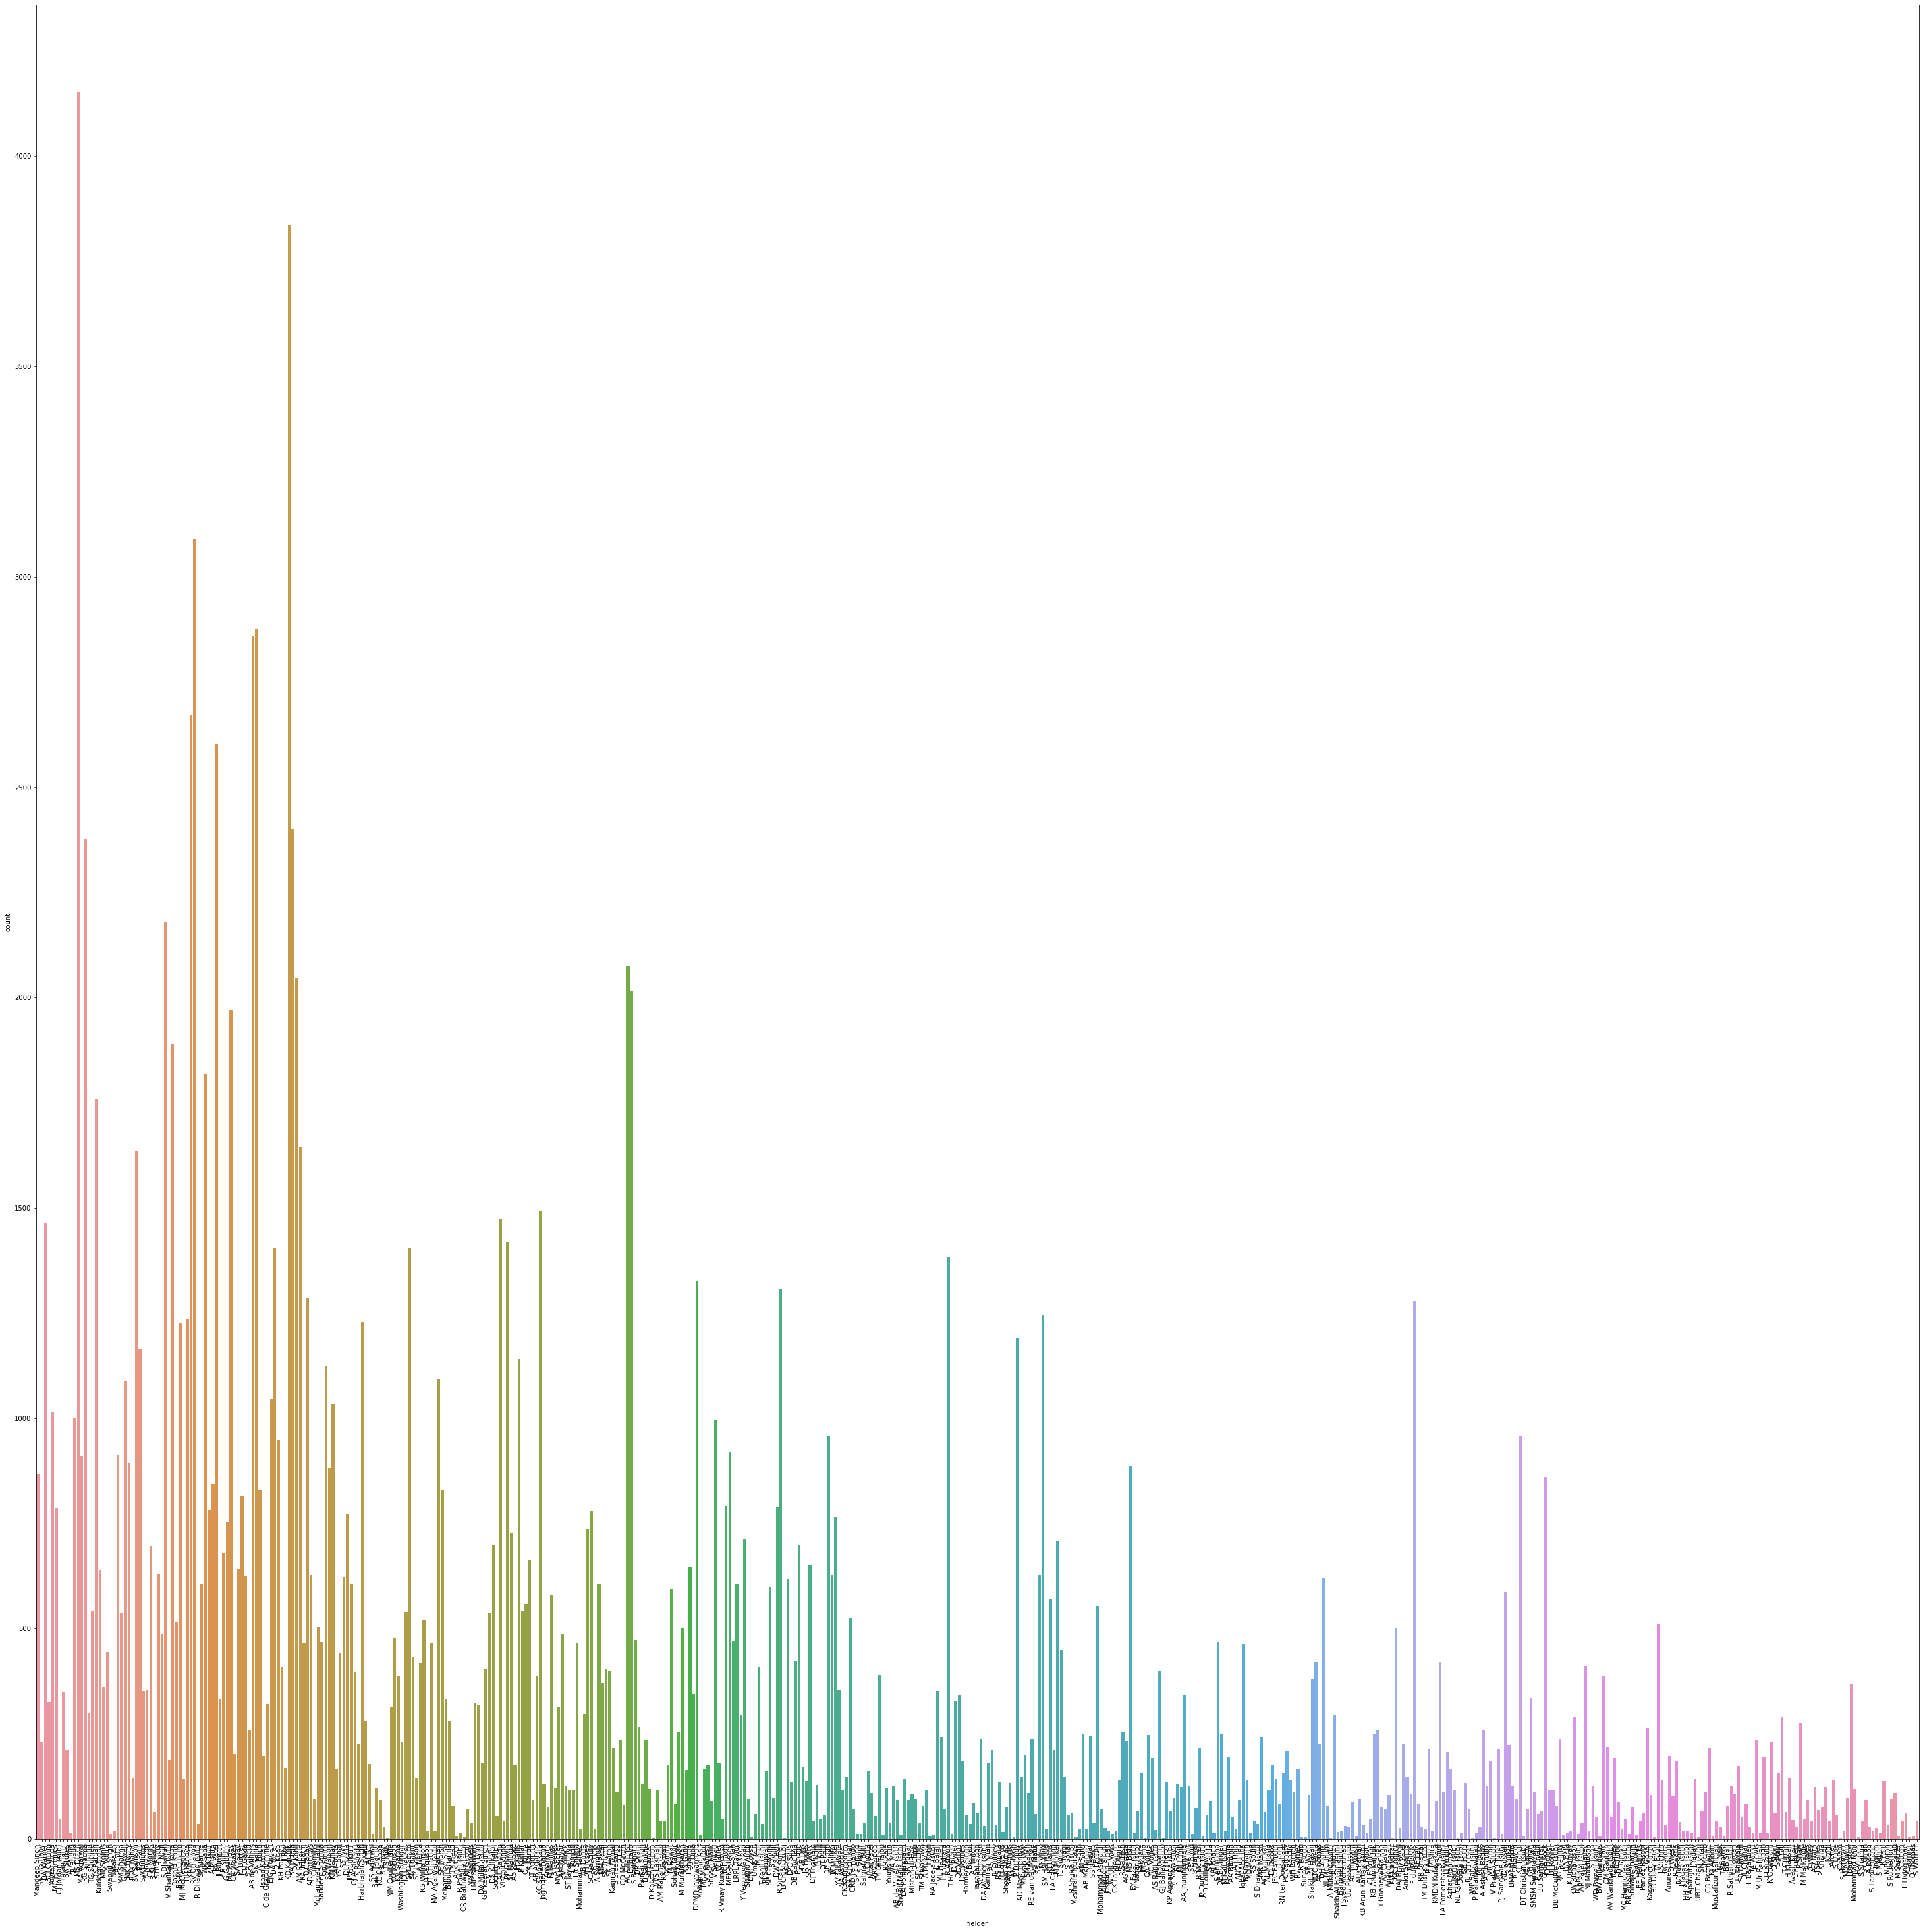

In [127]:
# visualizing the fielder

plt.figure(figsize= [50,50])
sns.countplot(ball['fielder'])
plt.xticks(rotation= 90)
plt.show()

#### From looking at the plot we get the visualization of the data and we cannot get the name as names are jumbled up but from value_counts() we get that most of the dismissal has done the fielder who was there was MS Dhoni.

#### Now by looking both the datasets from the match dataset we get that most of matches are won by Mumbai Indians, Chennai Super Kings, Kolkata Knight Riders and Royal Challengers Bangalore. These are most succesful teams as they win consistently and top 4 teams always reach to qualifiers of the tournament. Also out of 4 teams 3 have won the IPL trophies atleast twice and the one has that has left has never won the tournament yet but they give performance consistently.

#### The factors affecting the winning of these teams are home ground advantages, player present in those teams including both batsmen and bowlers and players experience also counts in to win the matches. Apart from that toss also play some role in winning the match as people are superstitiousand believe in luck. Also winning  is affected by decision which the toss winning team takes like whether to bat or field by analysing the pitch and weather condition on that day.

#### Also most of the players who are successful in the tornament are the ones who has won mostly player of the match like Chris Gayle, Virender Sehwag, Shane Watson, David Warner, MS Dhoni, Virat Kohli, AB de Villiers, Ajinkhye Rahane, Mayank Aggarwal and DPMD Jayawadhane. These player also play the important role in winning of their team as it observed that most of the time player of match award goes to winning team players.

#### From the ball dataset we get that most of the time the player got dismissed was V Kohli and the bowler who dismissed the batsmen most in the matches was H Singh. Also by looking at the ball dataset we get that most of the dismissal was done by getting caught and most the time the fielder present at the time of the dismissal was MS Dhoni.

#### Hence thats all the conclusion we can gather on the basis of the information present in both the datasets and the task has been done.